# FAA 1462 Pareja 10. Práctica 3 REGRESIÓN LOGÍSTICA Y ANÁLISIS ROC
## Kevin de la Coba Malam

En este documento se mostrarán los resultados del clasificador **Regresión Logística** usando diferentes *épocas* y *constantes de aprendizaje*. Posteriormente, se hará un **analísis ROC** de todos los clasificadores implementados. En este análisis se mostrarán **puntos sobre el espacio ROC** y una **curva ROC**.

En está practica, se han usado ambos tipos de validaciones, cruzada y simple. En concreto, con la validación cruzada se usan los valores K: **4, 6, 8, 10**. Para la validación simple se usán valores para el %: **25, 20, 15, 10**.

## Modificaciones
- Corrección en el clasificador K-NN. En el método *clasificar* siempre se normalizaban los datos, ahora solo se hace cuando el objeto tiene el atributo norm a true.
- *operaciones.py*. Archivo donde se guardan funciones para operar (por ahora unicamente **sigmoid**).
- Se han añadido más funciones en el archivo *MatrizConfusion.py* para calcular **TPR**, **FNR**, **FPR** y **TNR**.
- En la clase *ClasificadorRegresionLogistica* existe el método **clasificaProbs** que devuelve una lista con la probabilidad de cada instancia del test.

## Problemas
- En el espacio ROC los modelos KNN y Naive Bayes no devolvían datos útiles. Al clasificar siempre devolvían la clase 0, y el resultado en el espacio no creo que sea representativo.

In [1]:
# Para esconder los warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from Datos import Datos
import utils
import matplotlib.pyplot as plt

# Cargamos datos
pima = Datos("ConjuntosDatos/pima-indians-diabetes.data")
wdbc = Datos("ConjuntosDatos/wdbc.data")

## 1. Resultados Regresión Logística (Implementación propia)
A continuación se mostraran tablas en las cuales se realizan tests sobre los conjuntos de datos *pima* y *wdbc*. En estos tests la constante de aprendizaje varía entre **[0.5-2]** (en pasos de 0.5), y el número de épocas varía desde **[10-1000]** (en pasos de 15 hasta 100, y en pasos de 100 hasta 1000).

In [2]:
errorMedioPimaVC, errorMedioPimaVS, errorMedioWDBCVC, errorMedioWDBCVS = utils.RL_test(pima, wdbc)


*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=10*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=10 Constante aprendizaje=0.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.531250		0.103873
Validación Cruzada K-Folds=4			0.446615		0.103873
Validación Simple 20%				0.430065		0.104425
Validación Cruzada K-Folds=6			0.608073		0.443262
Validación Simple 15%				0.378261		0.129412
Validación Cruzada K-Folds=8			0.348958		0.112676
Validación Simple 10%				0.419737		0.194643
Validación Cruzada K-Folds=10			0.348684		0.085714
Test Épocas=10 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.417969		0.260563
Validación Cruzada K-Folds=4			0.399740		0.139085
Validación Simple 20%				0.475817		0.143363
Validación Cruzada K-Folds=6			0.376302		0.200355
Validación Simple 15%				0.421739		0.280392
Validación Cruzada K-Folds=8			0.355469		0.161972
Validación Simple 10%				0.413158		0.121429
Validación Cruzada K-Folds=10			0.338158		0.326786
Test Épocas=10 Constante ap

Validación Simple 25%				0.403646		0.091549
Validación Cruzada K-Folds=4			0.582031		0.091549
Validación Simple 20%				0.433987		0.150442
Validación Cruzada K-Folds=6			0.373698		0.118794
Validación Simple 15%				0.355072		0.178431
Validación Cruzada K-Folds=8			0.412760		0.102113
Validación Simple 10%				0.455263		0.133929
Validación Cruzada K-Folds=10			0.400000		0.325000

*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=70*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=70 Constante aprendizaje=0.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.335938		0.169014
Validación Cruzada K-Folds=4			0.417969		0.163732
Validación Simple 20%				0.369935		0.104425
Validación Cruzada K-Folds=6			0.368490		0.122340
Validación Simple 15%				0.415942		0.188235
Validación Cruzada K-Folds=8			0.484375		0.274648
Validación Simple 10%				0.378947		0.121429
Validación Cruzada K-Folds=10			0.440789		0.167857
Test Épocas=70 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.

Validación Simple 25%				0.420573		0.125000
Validación Cruzada K-Folds=4			0.403646		0.102113
Validación Simple 20%				0.392157		0.099115
Validación Cruzada K-Folds=6			0.464844		0.099291
Validación Simple 15%				0.395652		0.066667
Validación Cruzada K-Folds=8			0.501302		0.105634
Validación Simple 10%				0.419737		0.112500
Validación Cruzada K-Folds=10			0.436842		0.076786
Test Épocas=200 Constante aprendizaje=2.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.402344		0.082746
Validación Cruzada K-Folds=4			0.407552		0.102113
Validación Simple 20%				0.558170		0.159292
Validación Cruzada K-Folds=6			0.375000		0.083333
Validación Simple 15%				0.463768		0.113725
Validación Cruzada K-Folds=8			0.365885		0.139085
Validación Simple 10%				0.451316		0.094643
Validación Cruzada K-Folds=10			0.405263		0.096429

*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=300*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=300 Constante aprendizaje=0.5	Pima - Error		WDBC - Error
Validación Simple 25%			

Validación Simple 25%				0.540365		0.121479
Validación Cruzada K-Folds=4			0.350260		0.084507
Validación Simple 20%				0.364706		0.083186
Validación Cruzada K-Folds=6			0.384115		0.104610
Validación Simple 15%				0.356522		0.133333
Validación Cruzada K-Folds=8			0.498698		0.091549
Validación Simple 10%				0.492105		0.132143
Validación Cruzada K-Folds=10			0.573684		0.078571
Test Épocas=600 Constante aprendizaje=1.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.367188		0.144366
Validación Cruzada K-Folds=4			0.557292		0.158451
Validación Simple 20%				0.376471		0.138053
Validación Cruzada K-Folds=6			0.395833		0.095745
Validación Simple 15%				0.452174		0.088235
Validación Cruzada K-Folds=8			0.348958		0.117958
Validación Simple 10%				0.448684		0.103571
Validación Cruzada K-Folds=10			0.438158		0.103571
Test Épocas=600 Constante aprendizaje=2.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.346354		0.114437
Validación Cruzada K-Folds=4			0.397135		0.086268
Validación Sim

Validación Simple 25%				0.451823		0.139085
Validación Cruzada K-Folds=4			0.433594		0.096831
Validación Simple 20%				0.400000		0.092035
Validación Cruzada K-Folds=6			0.351562		0.109929
Validación Simple 15%				0.401449		0.168627
Validación Cruzada K-Folds=8			0.406250		0.100352
Validación Simple 10%				0.388158		0.123214
Validación Cruzada K-Folds=10			0.352632		0.073214
Test Épocas=1000 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.438802		0.080986
Validación Cruzada K-Folds=4			0.513021		0.128521
Validación Simple 20%				0.383007		0.116814
Validación Cruzada K-Folds=6			0.553385		0.085106
Validación Simple 15%				0.433333		0.109804
Validación Cruzada K-Folds=8			0.342448		0.096831
Validación Simple 10%				0.390789		0.116071
Validación Cruzada K-Folds=10			0.346053		0.100000
Test Épocas=1000 Constante aprendizaje=1.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.444010		0.110915
Validación Cruzada K-Folds=4			0.468750		0.098592
Validación S

### 1.1 Efecto del número de épocas.
A continuación se mostrarán varias gráficas en las cuales se puede ver la evolución del error con respecto al valor del número de épocas asignado para el entrenamiento.
#### 1.1.1 *Pima-Indians-Diabetes* Cte. aprendizaje=0.5

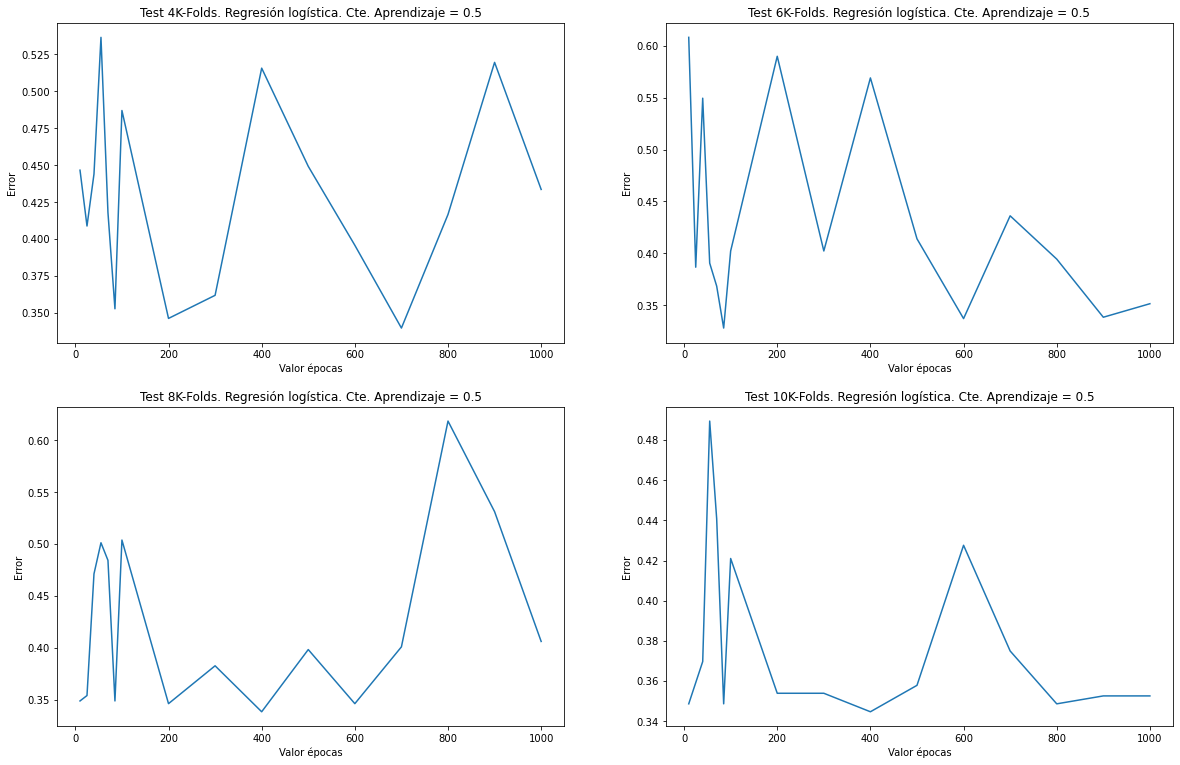

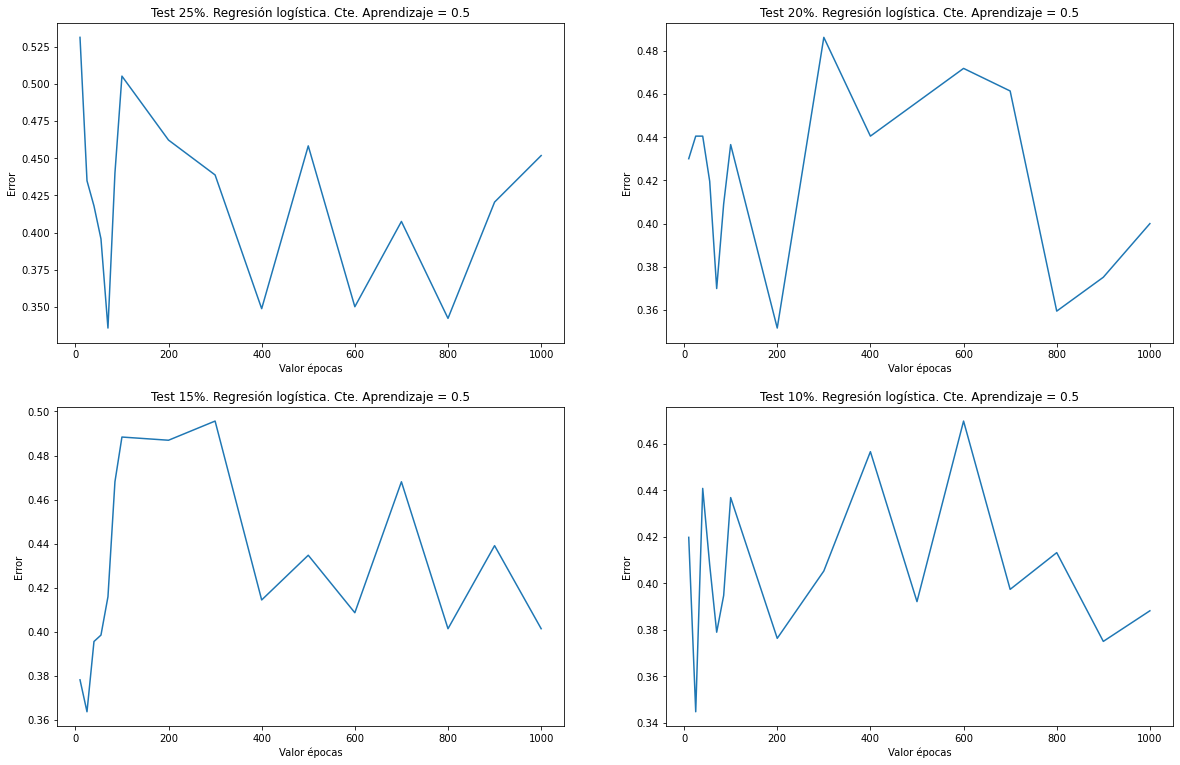

In [3]:
utils.plot_epoch(errorMedioPimaVC, 0.5, False)
utils.plot_epoch(errorMedioPimaVS, 0.5, True)

#### 1.1.1 *Pima-Indians-Diabetes* Cte. aprendizaje=1.0

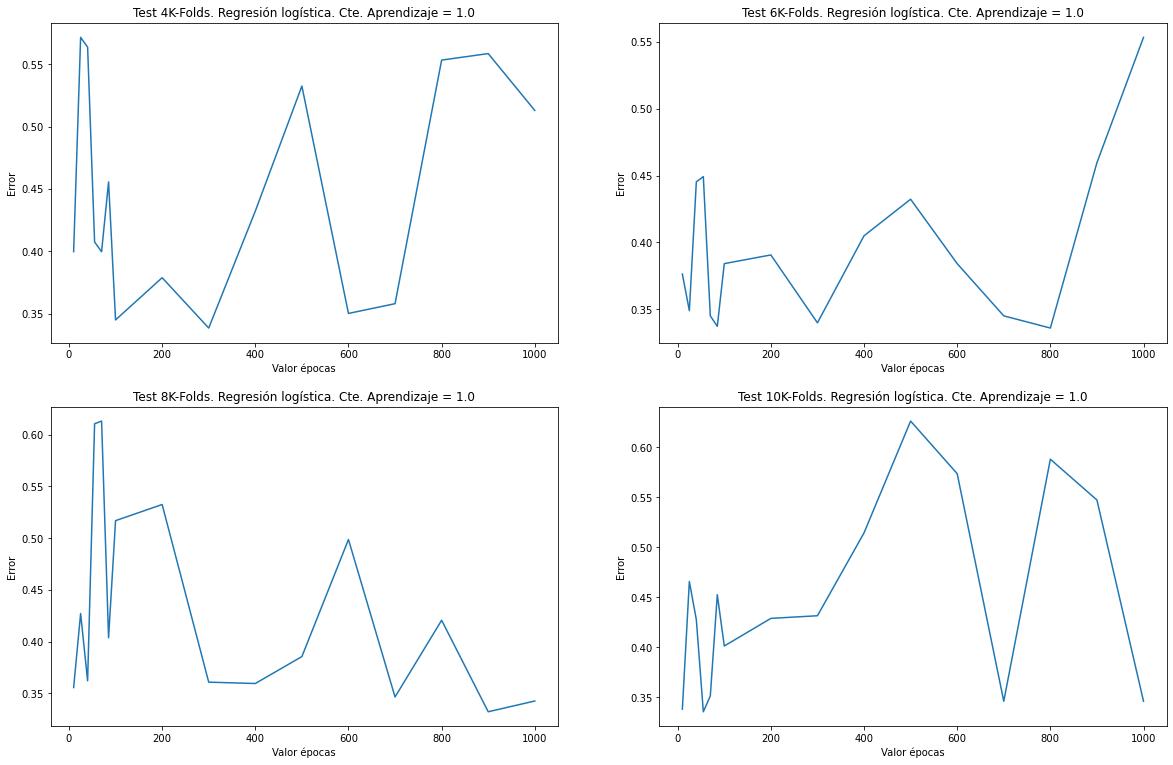

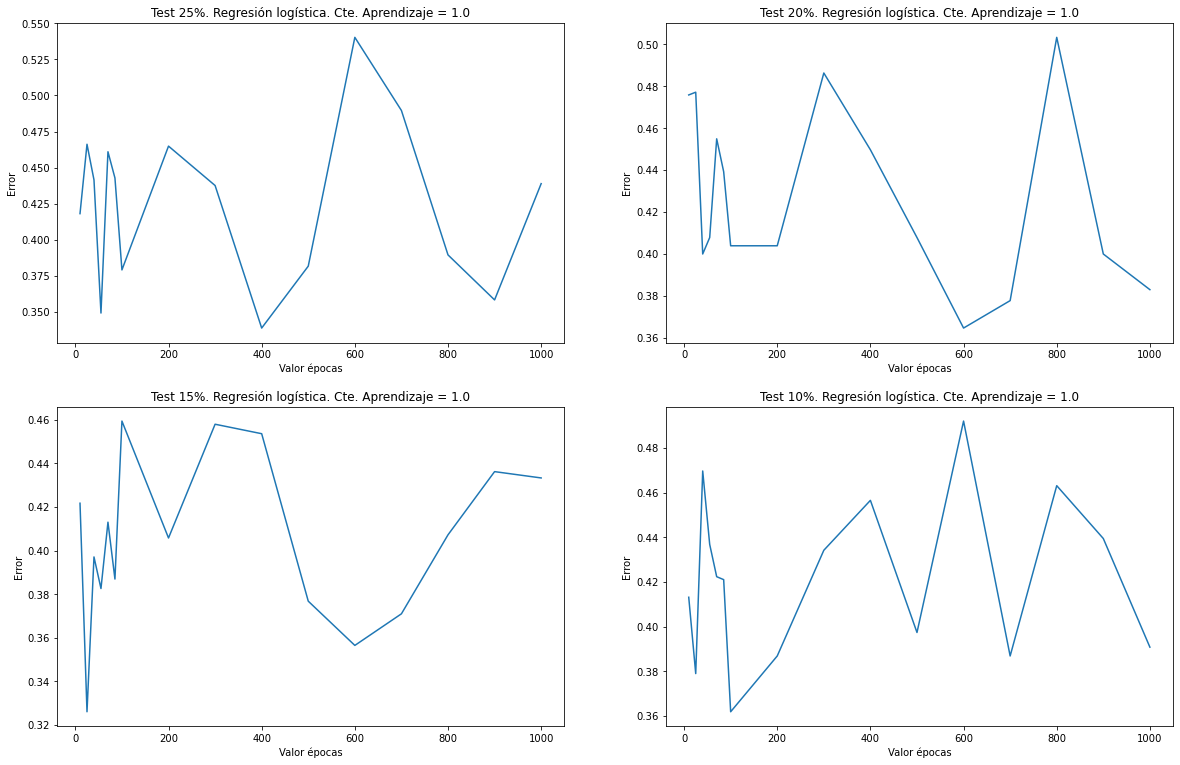

In [4]:
utils.plot_epoch(errorMedioPimaVC, 1.0, False)
utils.plot_epoch(errorMedioPimaVS, 1.0, True)

#### 1.1.1 *Pima-Indians-Diabetes* Cte. aprendizaje=1.5

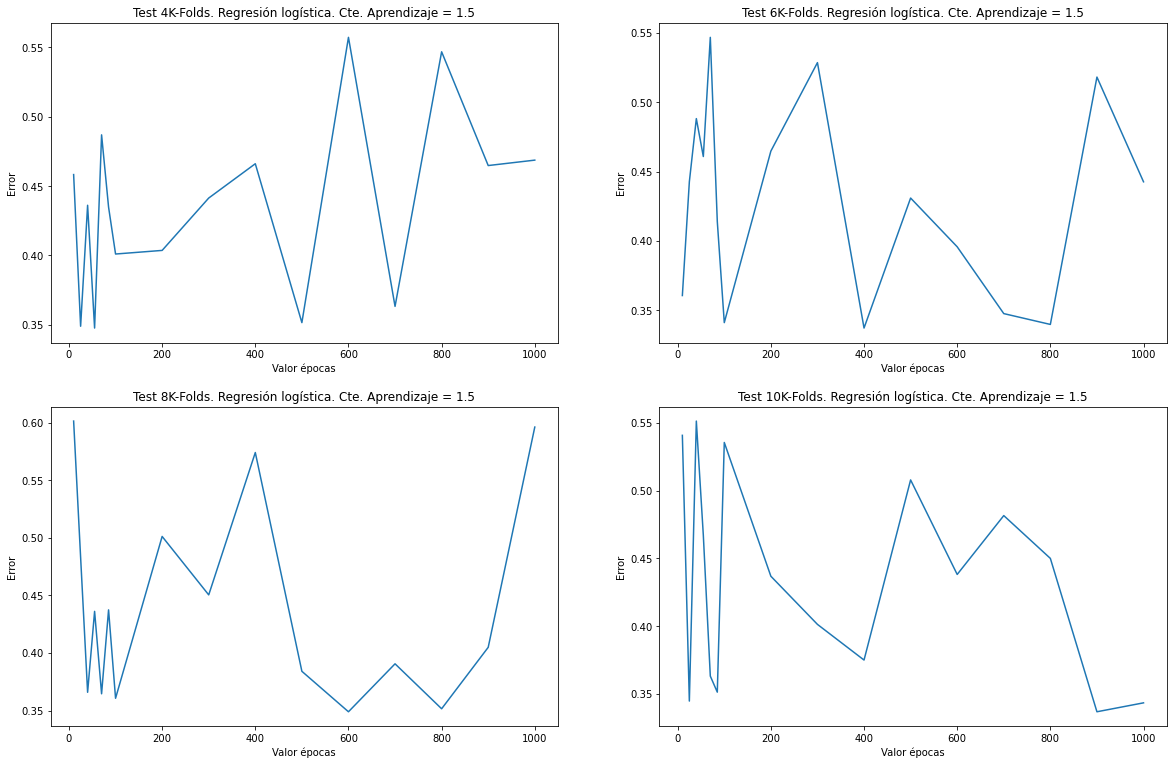

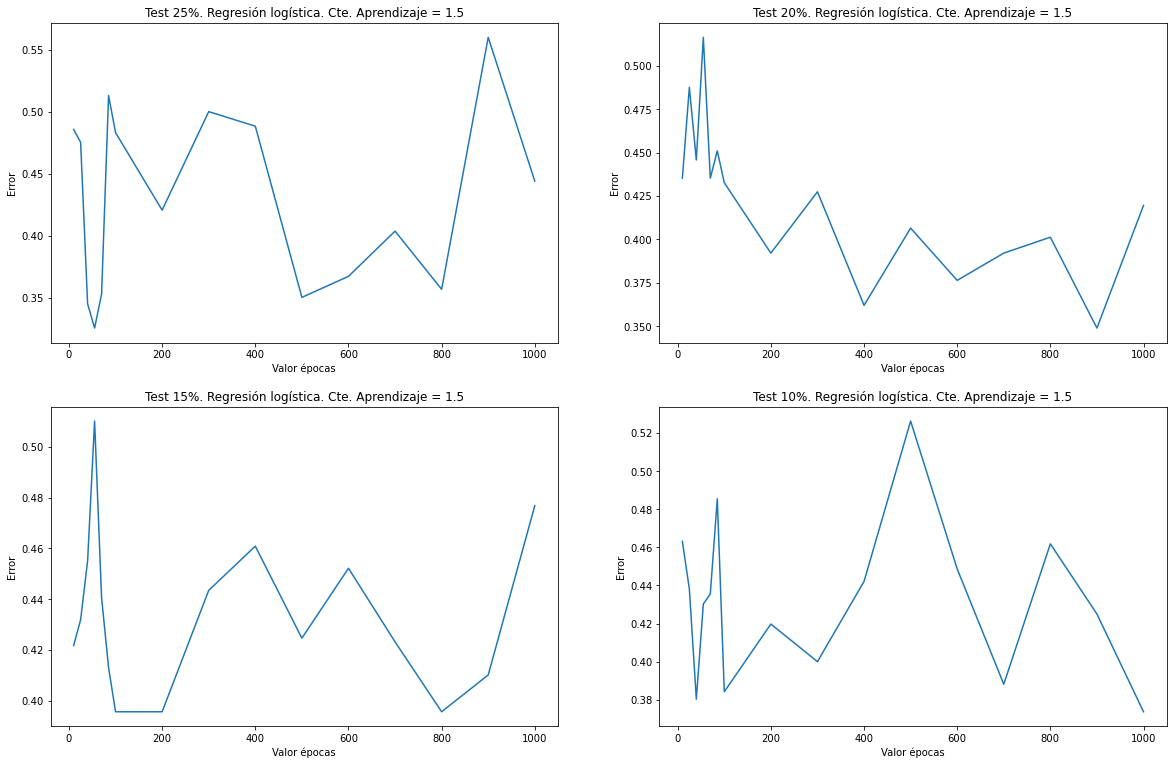

In [5]:
utils.plot_epoch(errorMedioPimaVC, 1.5, False)
utils.plot_epoch(errorMedioPimaVS, 1.5, True)

#### 1.1.1 *Pima-Indians-Diabetes* Cte. aprendizaje=2.0

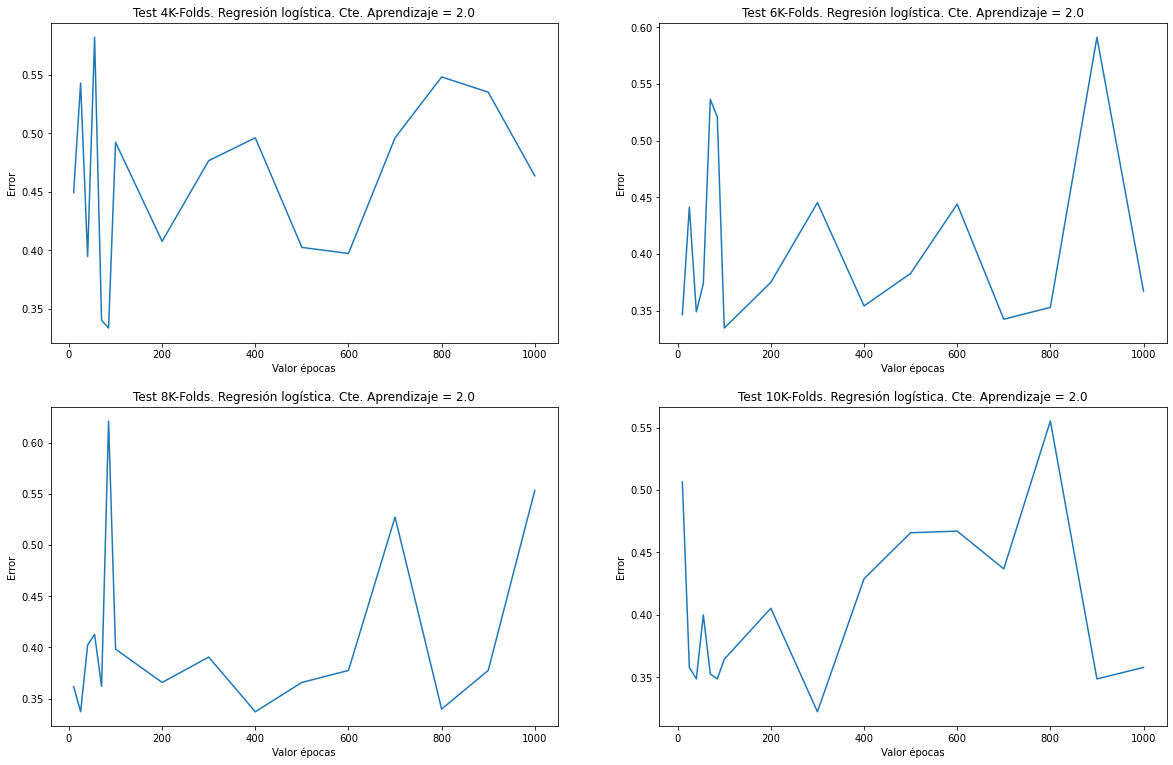

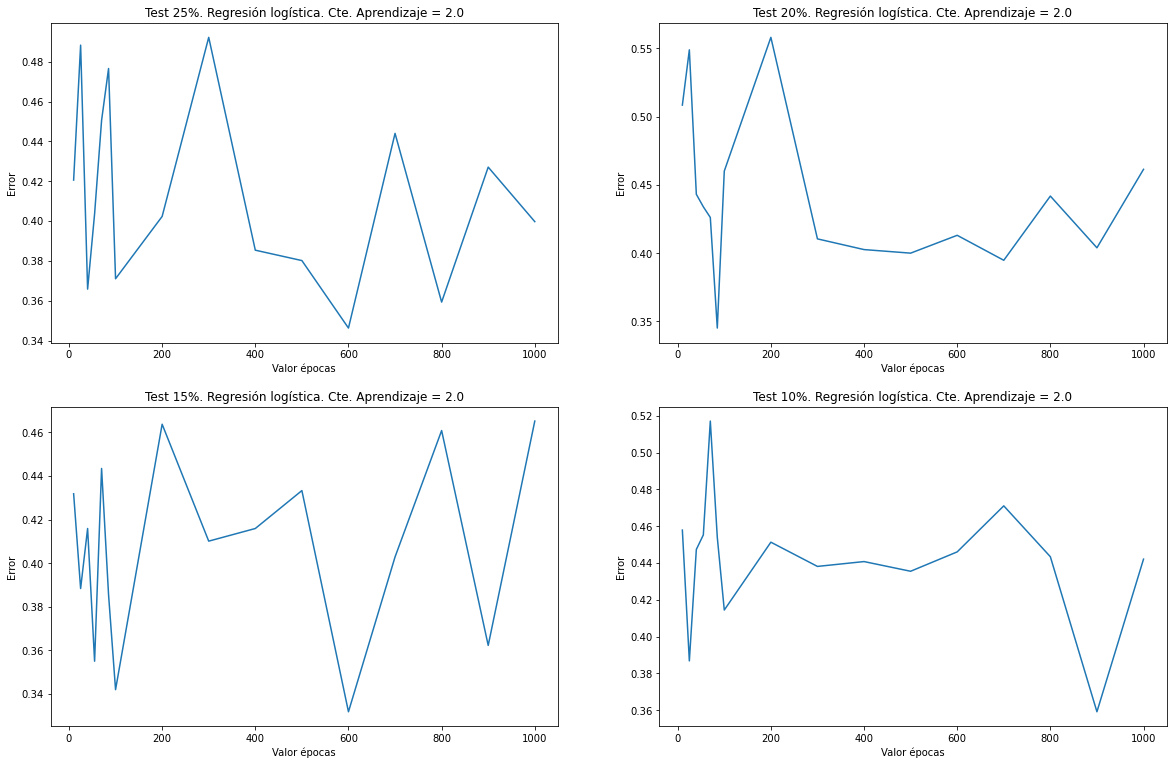

In [6]:
utils.plot_epoch(errorMedioPimaVC, 2.0, False)
utils.plot_epoch(errorMedioPimaVS, 2.0, True)

En estas primeras gráficas podemos ver que el número de épocas no parece haber disminuido en gran medida el error. Hay ejemplos en los que el error desciende un poco pero rápidamente vuelve a ascender. Esto puede deberse a la aleatoriedad de los pesos iniciales, puede ser que ciertos valores ayuden a encontrar un mínimo en el error y otros valores dificulten esto.
#### 1.1.2 *WDBC* Cte. aprendizaje=0.5

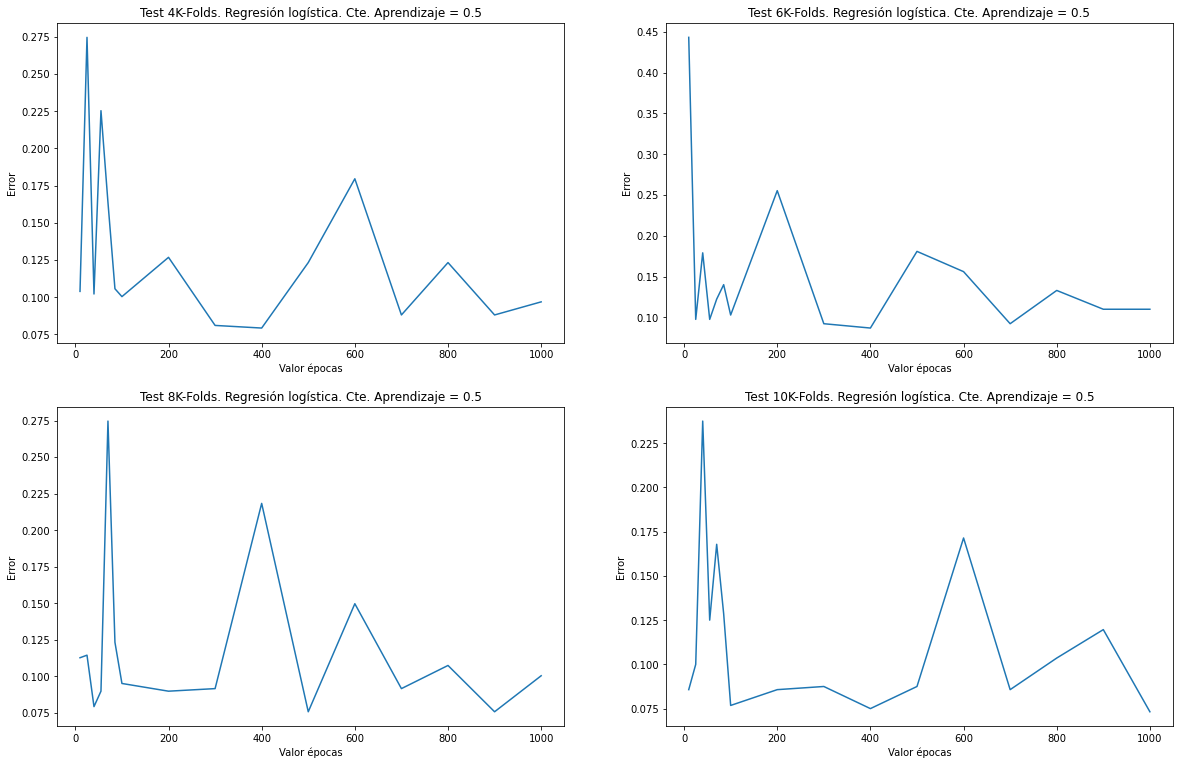

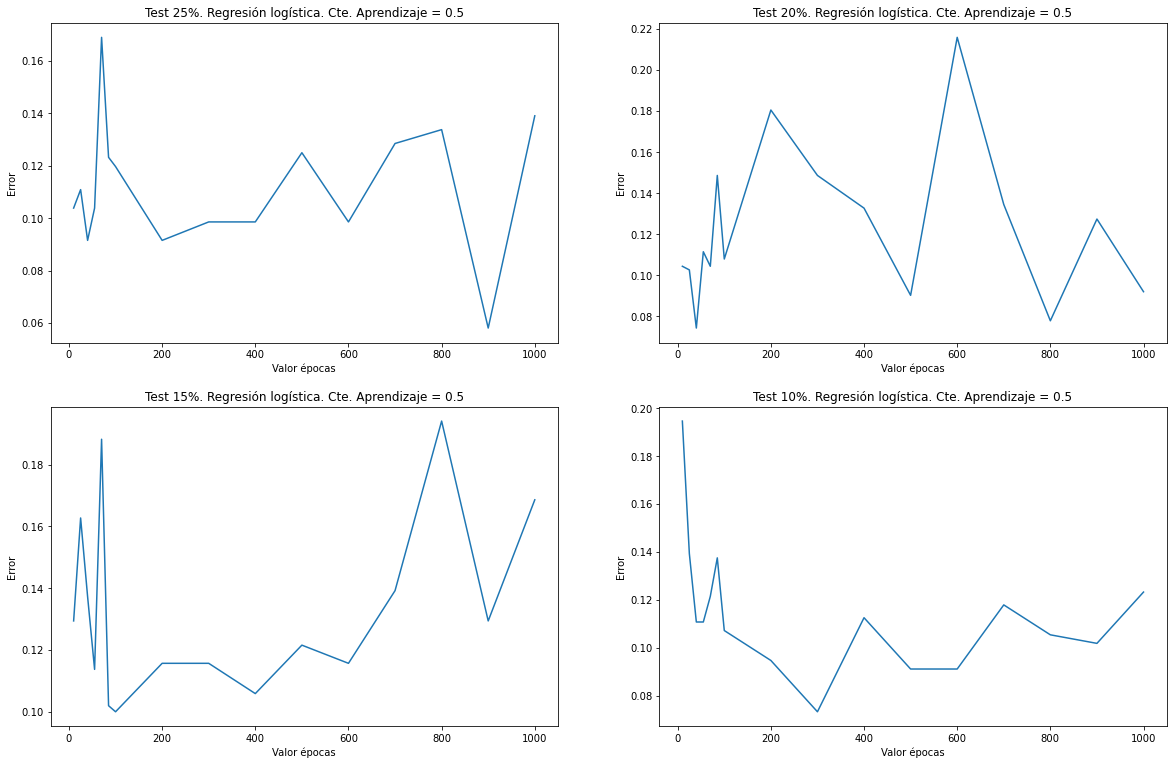

In [7]:
utils.plot_epoch(errorMedioWDBCVC, 0.5, False)
utils.plot_epoch(errorMedioWDBCVS, 0.5, True)

#### 1.1.2 *WDBC* Cte. aprendizaje=1.0

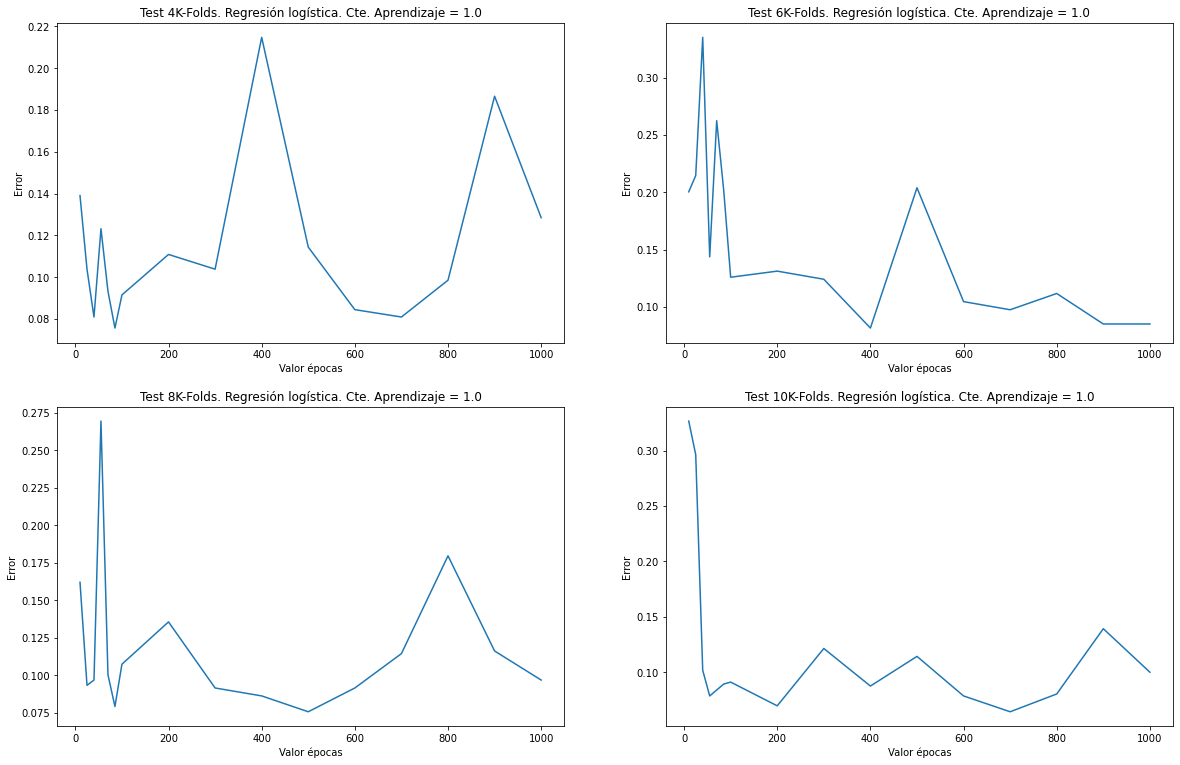

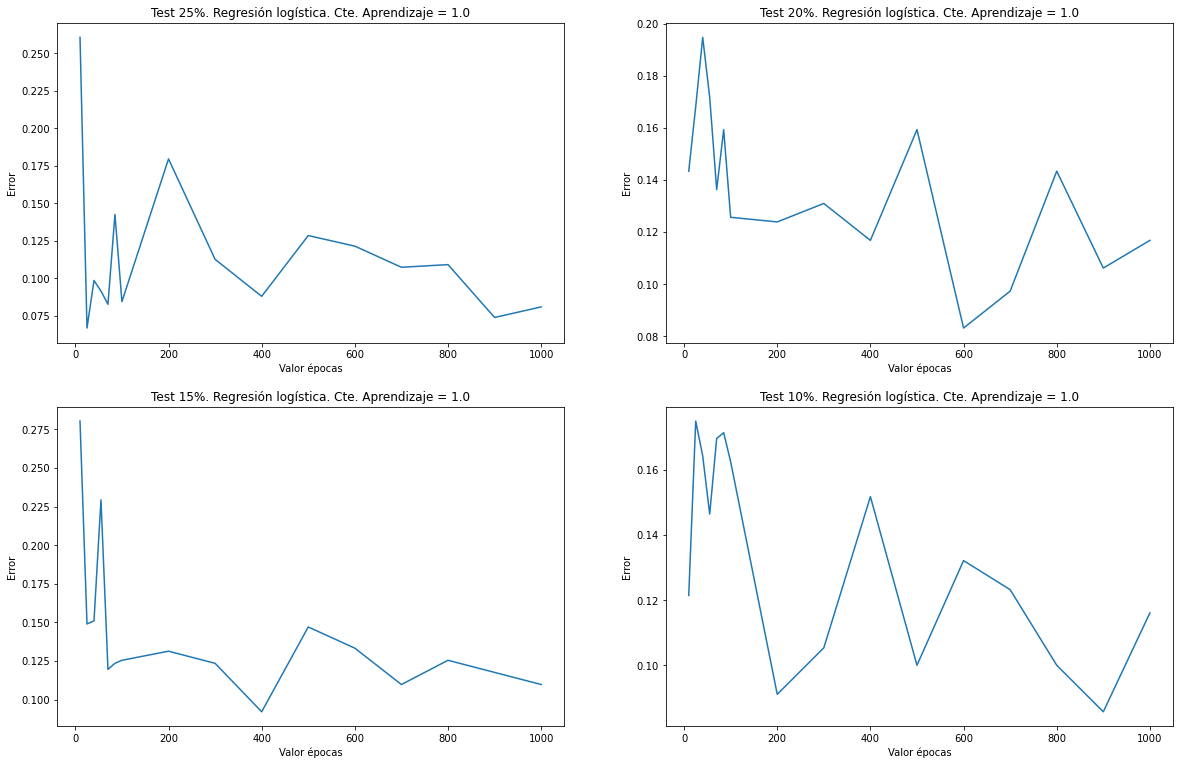

In [8]:
utils.plot_epoch(errorMedioWDBCVC, 1.0, False)
utils.plot_epoch(errorMedioWDBCVS, 1.0, True)

#### 1.1.2 *WDBC* Cte. aprendizaje=1.5

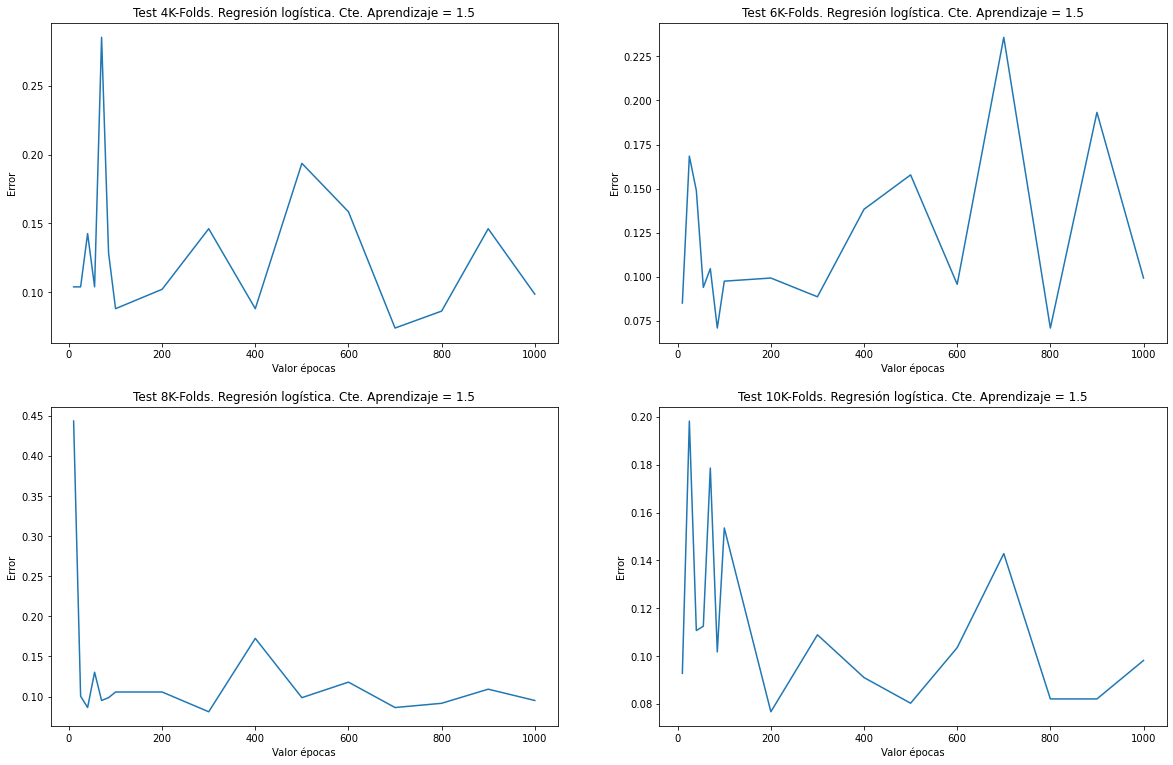

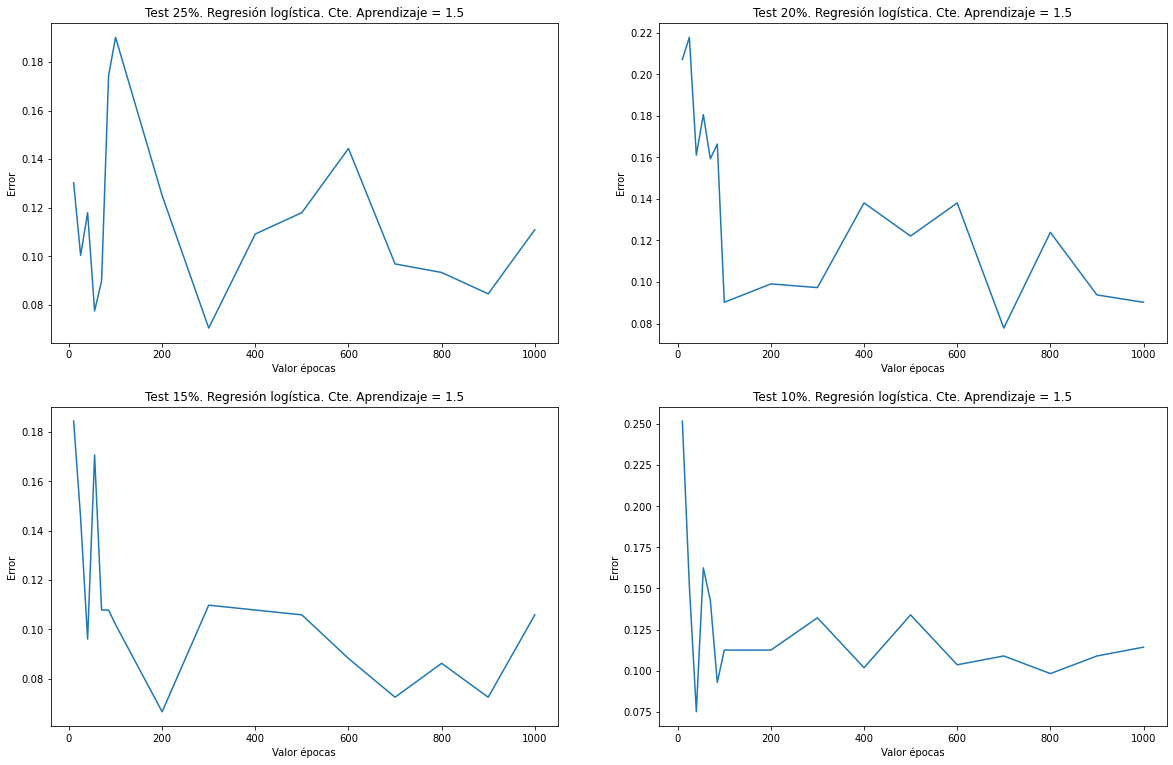

In [9]:
utils.plot_epoch(errorMedioWDBCVC, 1.5, False)
utils.plot_epoch(errorMedioWDBCVS, 1.5, True)

#### 1.1.2 *WDBC* Cte. aprendizaje=2.0

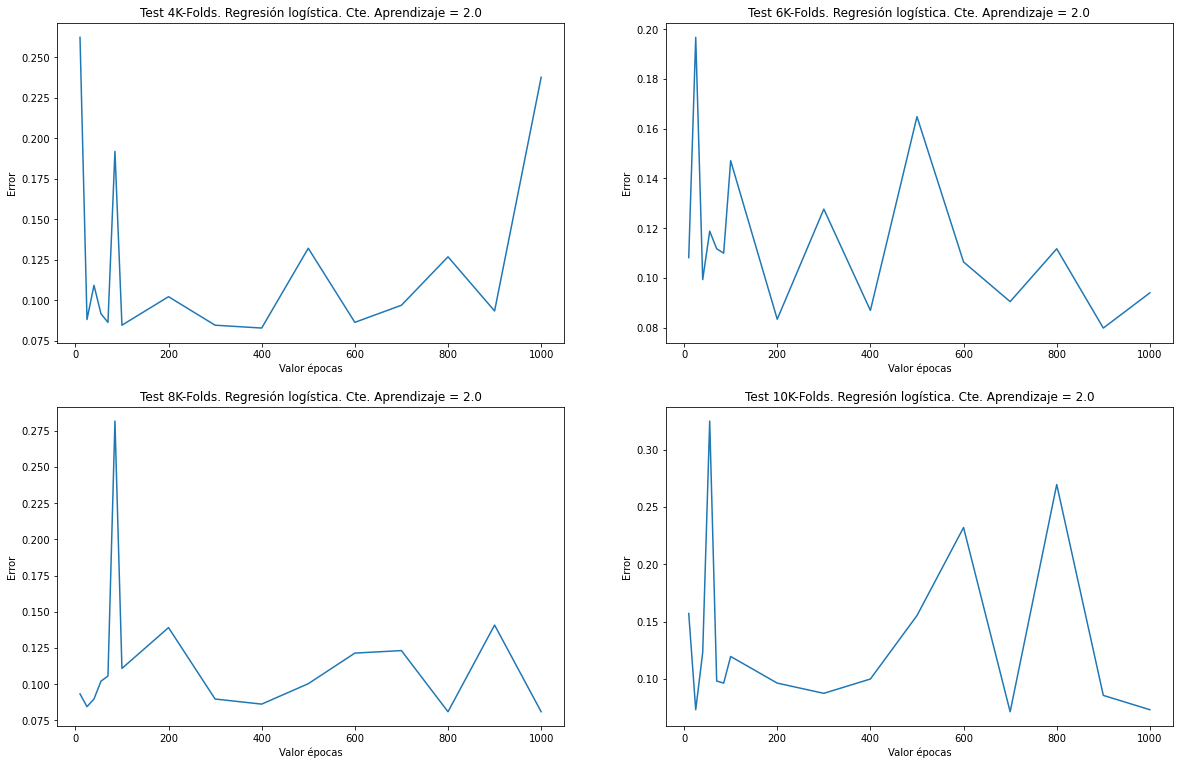

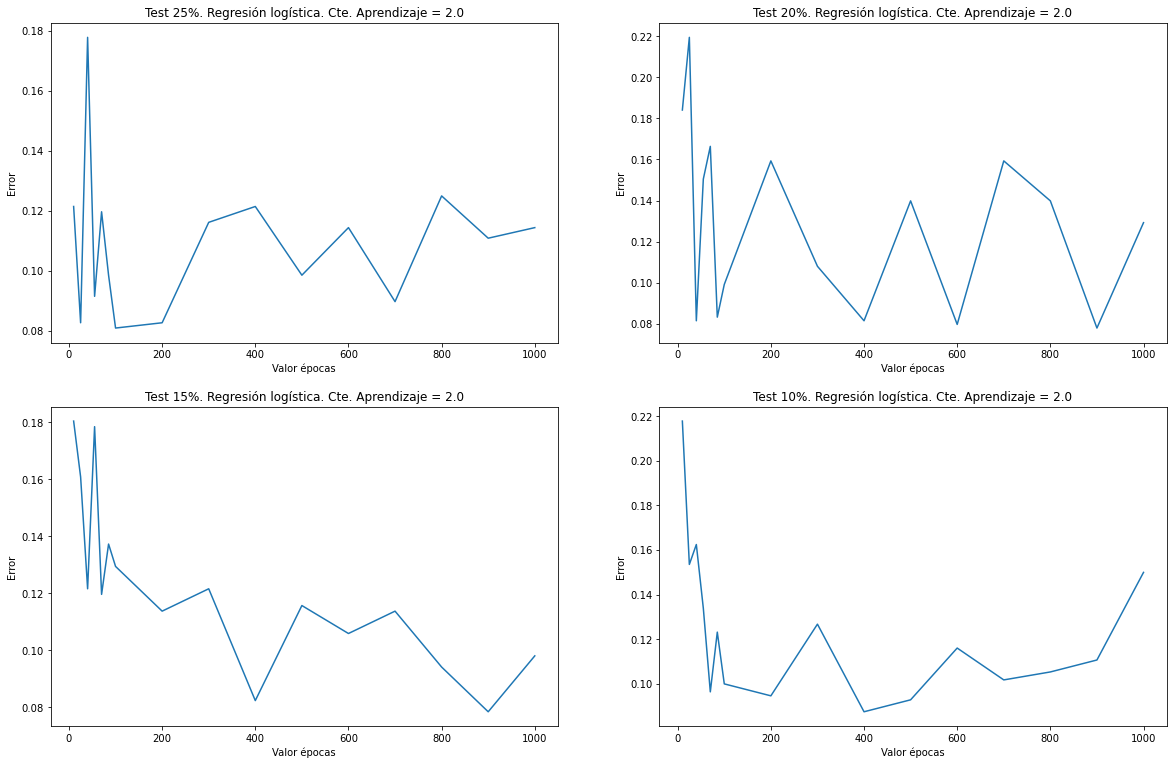

In [10]:
utils.plot_epoch(errorMedioWDBCVC, 2.0, False)
utils.plot_epoch(errorMedioWDBCVS, 2.0, True)

En este dataest es más notorio que los valores descienden con el número de épocas, aunque sigue habiendo repuntes del error. Esto nos puede dar a entender que las características de los propios datos influyen en el desarrollo del modelo. Sería conveniente pues tener en cuenta estas características.

En lo que concierne a el **número de épocas adecuado**, podríamos decir que a partir de **un valor >400**, el modelo que se crea es igual de efectivo. Con esto me refiero a que el error que da un modelo en el que se han usado 400 épocas puede ser el mismo o incluso inferior que uno que ha usado 1000 épocas.

Esto puede deberse a que, en el descenso se encuentra el mínimo. Habiendo encontrado el mínimo no es necesario entrenar más el modelo, lo único que se consigue es moverse alrededor del mínimo.

Pero este número *no es universal*, como se ha visto con el dataset de *Pima* 400 no es un valor adecuado.
### 1.2 Efecto de la Cte. de aprendizaje
Ahora veremos como se desarrolla el error en base al valor que se le da a la constante de aprendizaje. Para esto se usará un determinado número de épocas (donde se da un menor error), de esta forma se vera el impacto de la cte. 

#### 1.2.1 *Pima-Indians-Diabetes* Épocas = 500 

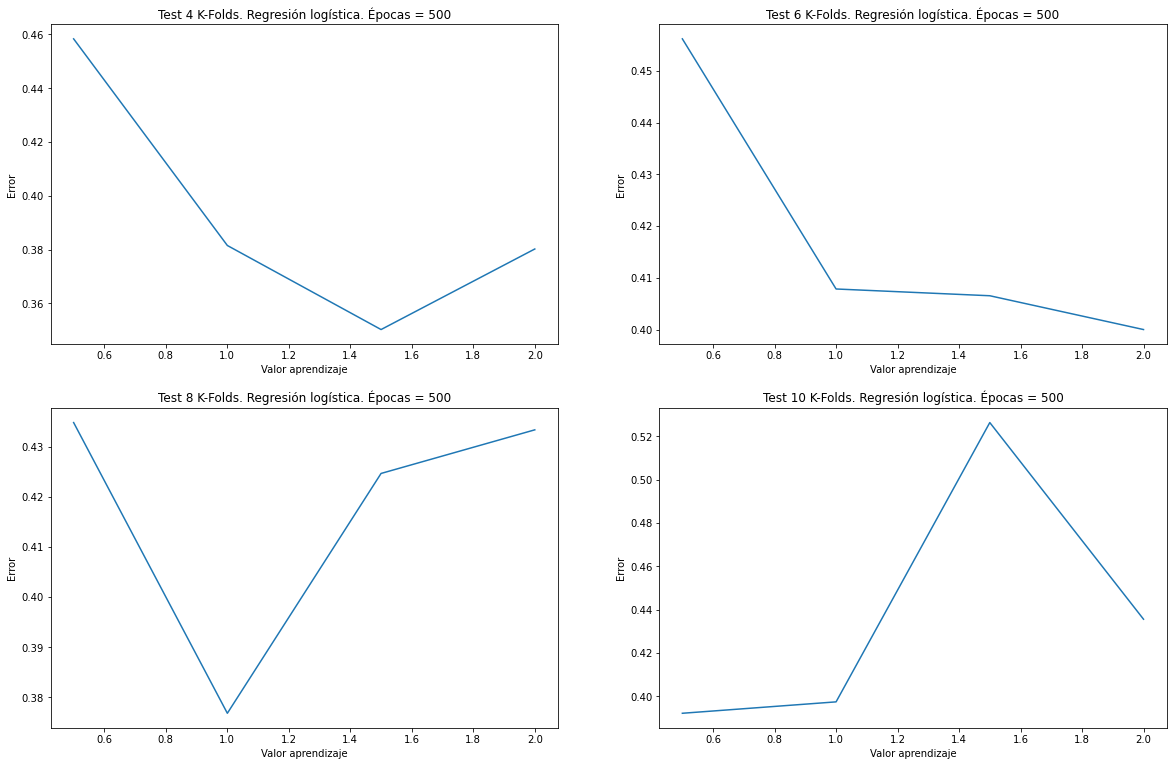

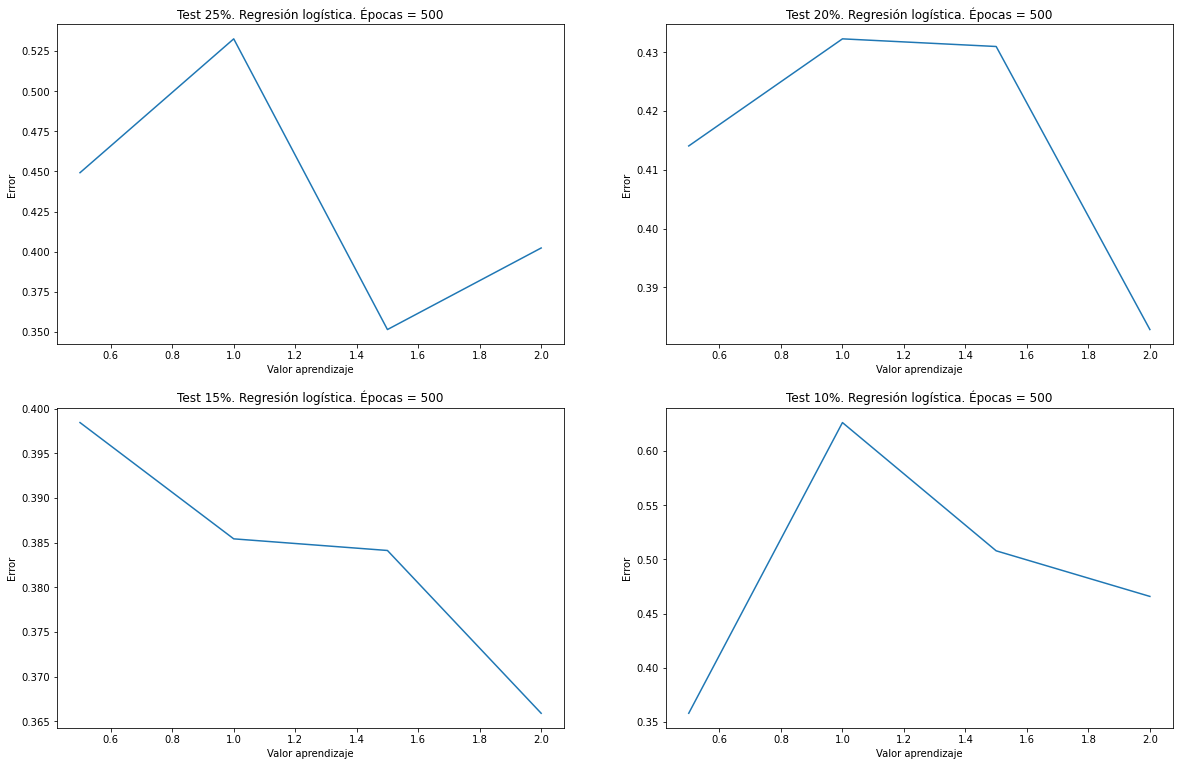

In [11]:
utils.plot_aprendizaje(errorMedioPimaVS, 500, False)
utils.plot_aprendizaje(errorMedioPimaVC, 500, True)

A primera vista podemos decir que *en general* el error desciende mientras aumenta la constante de aprendizaje. Podemos interpretar esto de la siguiente forma: Si estamos en un valle lleno de pequeños montes y queremos saber donde está el mínimo, podemos hacer 2 cosas:
- 1. Tirar una canica por el monte (constante de aprendizaje pequeña).
- 2. Tirar un balon de futbol con un diámetro de 2 metros (constante de aprendizaje grande).

Dependiendo del monte (de los datos) debemos usar uno u otro. La canica tendríamos que usarlo en lugares donde haya varios mínimos y muy parejos, ya que **la canica se mueve lentamente** mientras busca el mínimo. En cambio, si en estos lugares usamos el balón, es posible **nos saltemos un mínimo** debido a la velocidad con la que se mueve el balón, es posible que pase por el mínimo absoluto pero se quede en un mínimo local. En cambio, si estamos en un lugar donde los mínimos son amplios y muy distantes, el balón es el sujeto perfecto, ya que gracias a sus rápidos movimientos **podemos alcanzar el mínimo en poco tiempo (pocas épocas de entrenamiento)**.

Al final todo depende del problema, en este caso parece que una constante **>=1.5** devuelve un resultado optimo.
#### 1.2.2 *WDBC* Épocas = 500

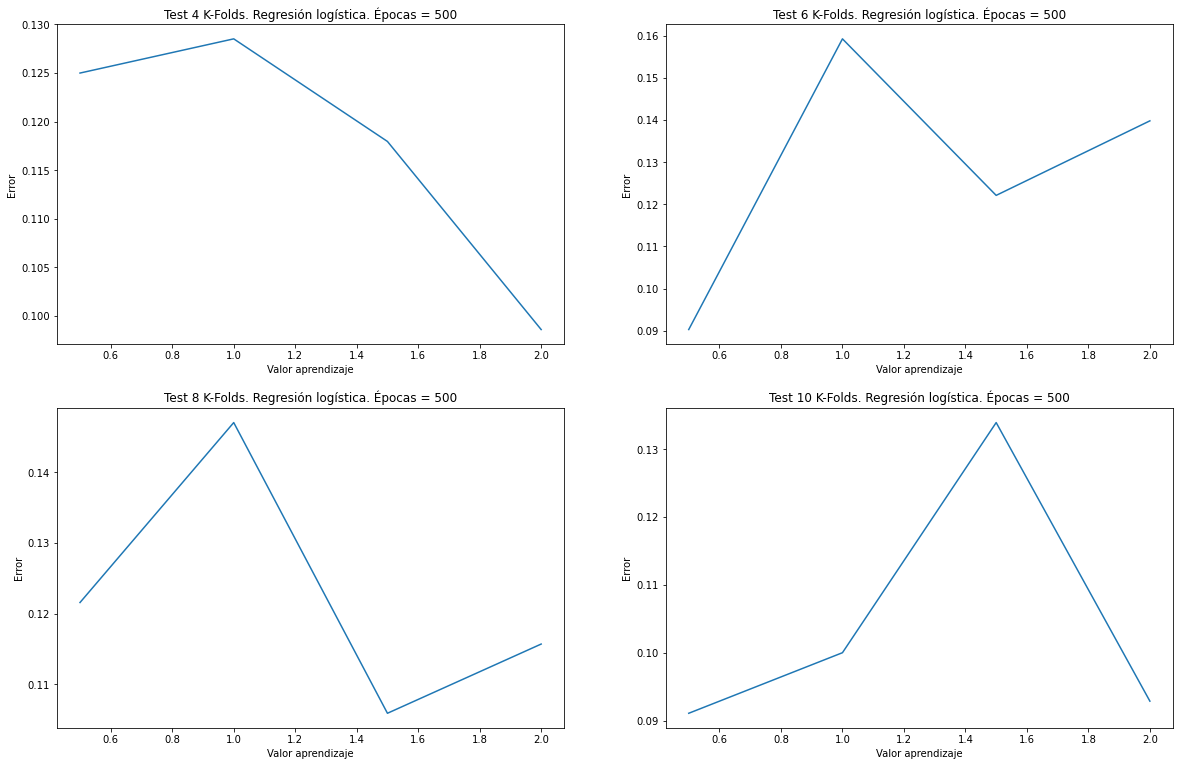

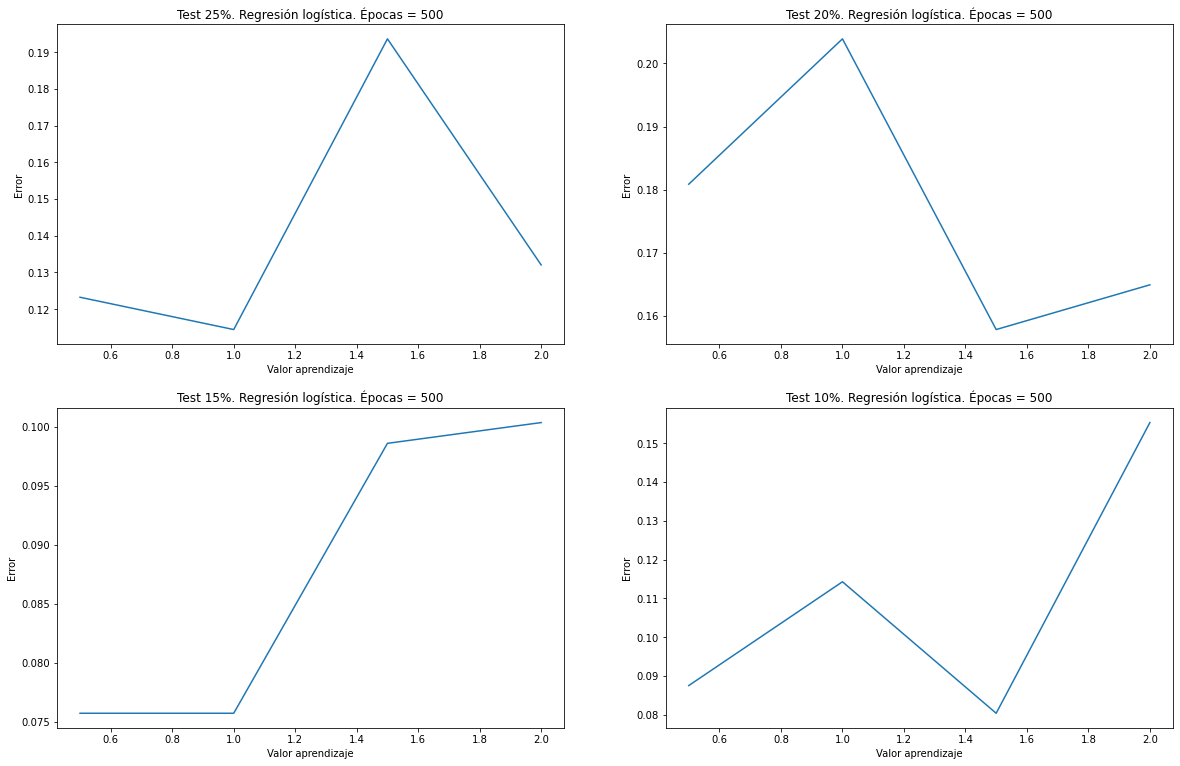

In [12]:
utils.plot_aprendizaje(errorMedioWDBCVS, 500, False)
utils.plot_aprendizaje(errorMedioWDBCVC, 500, True)

En este dataset no parece tan beneficioso el tener una constante de aprendizaje alta. Como se ha mencionado antes, esto puede deberse a la propia estructura del dataset y sus atributos.
#### 1.2.3 Error medio PIMA

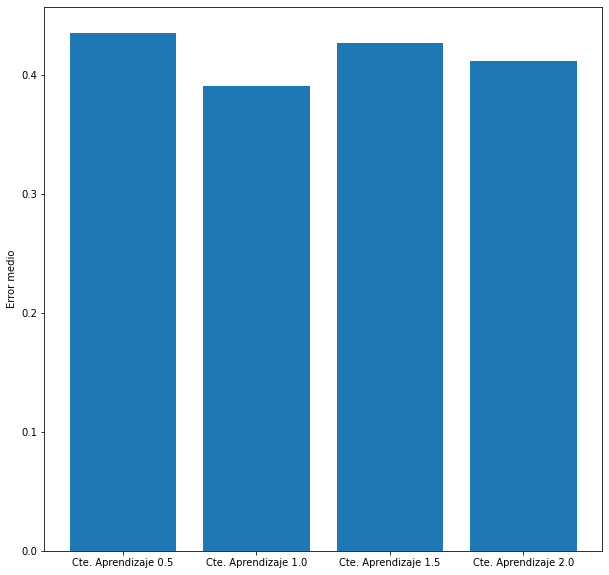

In [13]:
datos = (errorMedioPimaVS, errorMedioPimaVS)
utils.plot_histograms(datos, 500)

En este histograma podemos ver mejor el impacto de la constante de aprendizaje sobre el dataset. A la conclusión que podemos llegar es que el valor de este no es el que más influye en el error, ya que los resultados son muy parejos.
#### 1.2.4 Error medio WDBC

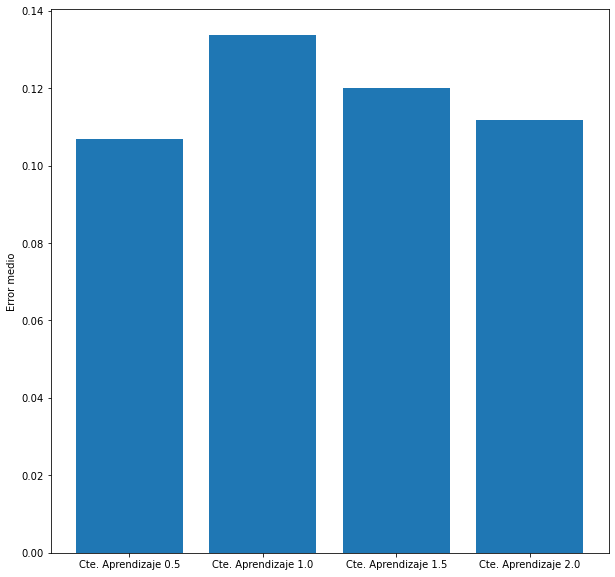

In [14]:
datos = (errorMedioWDBCVS, errorMedioWDBCVS)
utils.plot_histograms(datos, 500)

Al igual que en el histograma anterior, los resultados están muy parejos. Podríamos llegar a la conclusión de que una constante de aprendizaje pequeña (en este caso **0.5**) tiene un mayor impacto sobre el error. 
### 1.3 CONCLUSIÓN
* **Épocas**. El número de épocas es un factor clave y no podemos ignorarlo. Como se ha visto de mejor forma en el dataset *WDBC*, **un número pequeño de épocas influye negativamente en el modelo**, aunque esto no quiere decir que cuantas más mejor, hay un punto en el que se encuentra el mínimo y no es necesario seguir entrenando al modelo.
* **Constante de aprendizaje**. No me atrevería a decir que constante de aprendizaje resulta mejor para cada dataset, pero hay que tener en cuenta las características del dataset para establecer este valor. Como se ha mencionado antes, **si los mínimos están muy parejos, una constante menor resulta más beneficiosa**, pero si los mínimos son muy distantes, **una mayor constante puede hacer que sean necesarias menos épocas**.

## 2. Resultados Regresión Logística (Implementación SKLearn)
De nuevo, se van a mostrar tablas con la tasa de error que cometen los modelos de **SKLearn**. En estos tests la constante de aprendizaje varía entre **[0.5-2]** (en pasos de 0.5), y el número de épocas varía desde **[10-1000]** (en pasos de 15 hasta 100, y en pasos de 100 hasta 1000).

Antes de mostrar los datos responderemos a la siguiente pregunta:

### Diferencia entre *LogisticRegression* y *SGDClassifier*

- *LogisticRegression*. Busca la **máxima entropía para clasificar**. [https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression]
- *SGDClassifier*. SGD (Stochastic Gradient Descent) es una técnica de optimización y no se corresponde a ninguna familia de modelos en el aprendizaje automático. [https://scikit-learn.org/stable/modules/sgd.html#sgd]

Dadas estas definiciones, podemos concluir pues que el *SGDClassifier* es una técnica que optimiza, mientras que *LogisticRegression* es un clasificador que busca la máxima entropía.

Antes de continuar, en la página de SKLearn no parece haber un parámetro en el constructor de *LogisticRegression* que se refiera a una constante de aprendizaje. Por esta razón, los tests con este clasificador no muestran ninguna constante.

### Tablas *Logistic Regression* (sin cte aprendizaje)

In [15]:
errorMedioPimaVC_logistic, errorMedioPimaVS_logistic, errorMedioWDBCVC_logistic, errorMedioWDBCVS_logistic = utils.RL_test_SK_logistic(pima, wdbc)


*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=10*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=10				Pima - Error		WDBC - Error
Validación Simple 25%			0.332031		0.083916
Validación Cruzada K-Folds=4		0.324219		0.096720
Validación Simple 20%			0.323377		0.092982
Validación Cruzada K-Folds=6		0.320312		0.093188
Validación Simple 15%			0.308908		0.096899
Validación Cruzada K-Folds=8		0.321615		0.094973
Validación Simple 10%			0.324675		0.080702
Validación Cruzada K-Folds=10		0.325496		0.089599

*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=25*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=25				Pima - Error		WDBC - Error
Validación Simple 25%			0.309896		0.080420
Validación Cruzada K-Folds=4		0.326823		0.073771
Validación Simple 20%			0.322078		0.064912
Validación Cruzada K-Folds=6		0.326823		0.080814
Validación Simple 15%			0.317529		0.073643
Validación Cruzada K-Folds=8		0.311198		0.082624
Validación Simple 10%			0.337662		0.077193
Validación Cruzada K-Folds=10		0.326811		0.079041

*-*-*

Validación Simple 25%			0.226562		0.043706
Validación Cruzada K-Folds=4		0.235677		0.063269
Validación Simple 20%			0.215584		0.049123
Validación Cruzada K-Folds=6		0.223958		0.045670
Validación Simple 15%			0.239943		0.042636
Validación Cruzada K-Folds=8		0.227865		0.049222
Validación Simple 10%			0.215584		0.043860
Validación Cruzada K-Folds=10		0.226521		0.047431

*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=1000*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=1000				Pima - Error		WDBC - Error
Validación Simple 25%			0.244792		0.043706
Validación Cruzada K-Folds=4		0.235677		0.057988
Validación Simple 20%			0.236364		0.054386
Validación Cruzada K-Folds=6		0.223958		0.047424
Validación Simple 15%			0.229885		0.048450
Validación Cruzada K-Folds=8		0.227865		0.045726
Validación Simple 10%			0.220779		0.049123
Validación Cruzada K-Folds=10		0.226521		0.045677


### Tablas *SGBD Regression*

In [16]:
errorMedioPimaVC_SGBD, errorMedioPimaVS_SGBD, errorMedioWDBCVC_SGBD, errorMedioWDBCVS_SGBD = utils.RL_test_SK_SGBD(pima, wdbc)


*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=10*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=10 Constante aprendizaje=0.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.369792		0.256993
Validación Cruzada K-Folds=4			0.434896		0.267470
Validación Simple 20%				0.435065		0.254386
Validación Cruzada K-Folds=6			0.434896		0.122956
Validación Simple 15%				0.376437		0.195736
Validación Cruzada K-Folds=8			0.419271		0.131847
Validación Simple 10%				0.372727		0.156140
Validación Cruzada K-Folds=10			0.462543		0.154511
Test Épocas=10 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.386719		0.162587
Validación Cruzada K-Folds=4			0.480469		0.186226
Validación Simple 20%				0.475325		0.184211
Validación Cruzada K-Folds=6			0.385417		0.219672
Validación Simple 15%				0.507184		0.083333
Validación Cruzada K-Folds=8			0.451823		0.212881
Validación Simple 10%				0.455844		0.105263
Validación Cruzada K-Folds=10			0.390584		0.135244
Test Épocas=10 Constante ap

Validación Simple 15%				0.412356		0.098837
Validación Cruzada K-Folds=8			0.446615		0.175959
Validación Simple 10%				0.428571		0.170175
Validación Cruzada K-Folds=10			0.406288		0.158051
Test Épocas=70 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.446615		0.232517
Validación Cruzada K-Folds=4			0.488281		0.126625
Validación Simple 20%				0.480519		0.133333
Validación Cruzada K-Folds=6			0.425781		0.179433
Validación Simple 15%				0.405172		0.174419
Validación Cruzada K-Folds=8			0.367188		0.172217
Validación Simple 10%				0.414286		0.135088
Validación Cruzada K-Folds=10			0.394737		0.184743
Test Épocas=70 Constante aprendizaje=1.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.382812		0.180070
Validación Cruzada K-Folds=4			0.432292		0.235731
Validación Simple 20%				0.418182		0.138596
Validación Cruzada K-Folds=6			0.457031		0.130049
Validación Simple 15%				0.438218		0.176357
Validación Cruzada K-Folds=8			0.471354		0.142410
Validación Simpl

Validación Simple 15%				0.521552		0.155039
Validación Cruzada K-Folds=8			0.454427		0.177523
Validación Simple 10%				0.419481		0.112281
Validación Cruzada K-Folds=10			0.468387		0.163283
Test Épocas=300 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.414062		0.115385
Validación Cruzada K-Folds=4			0.572917		0.242785
Validación Simple 20%				0.412987		0.224561
Validación Cruzada K-Folds=6			0.346354		0.139063
Validación Simple 15%				0.510057		0.211240
Validación Cruzada K-Folds=8			0.403646		0.181118
Validación Simple 10%				0.479221		0.292982
Validación Cruzada K-Folds=10			0.379135		0.128195
Test Épocas=300 Constante aprendizaje=1.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.369792		0.230769
Validación Cruzada K-Folds=4			0.444010		0.237578
Validación Simple 20%				0.485714		0.268421
Validación Cruzada K-Folds=6			0.358073		0.228238
Validación Simple 15%				0.395115		0.118217
Validación Cruzada K-Folds=8			0.401042		0.163537
Validación Sim

Validación Simple 10%				0.409091		0.135088
Validación Cruzada K-Folds=10			0.404853		0.101880
Test Épocas=700 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.408854		0.141608
Validación Cruzada K-Folds=4			0.410156		0.137201
Validación Simple 20%				0.493506		0.101754
Validación Cruzada K-Folds=6			0.399740		0.154610
Validación Simple 15%				0.423851		0.153101
Validación Cruzada K-Folds=8			0.493490		0.230316
Validación Simple 10%				0.429870		0.224561
Validación Cruzada K-Folds=10			0.458288		0.170426
Test Épocas=700 Constante aprendizaje=1.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.524740		0.174825
Validación Cruzada K-Folds=4			0.358073		0.121282
Validación Simple 20%				0.424675		0.138596
Validación Cruzada K-Folds=6			0.359375		0.186114
Validación Simple 15%				0.436782		0.187984
Validación Cruzada K-Folds=8			0.494792		0.168696
Validación Simple 10%				0.401299		0.231579
Validación Cruzada K-Folds=10			0.400017		0.184367
Test Épocas=7

Validación Cruzada K-Folds=10			0.480417		0.168703


### 2.1 Efecto del número de épocas.
A continuación se mostrarán varias gráficas en las cuales se puede ver la evolución del error con respecto al valor del número de épocas asignado para el entrenamiento.
#### 2.1.1 *LogisticRegression Pima-Indians-Diabetes*

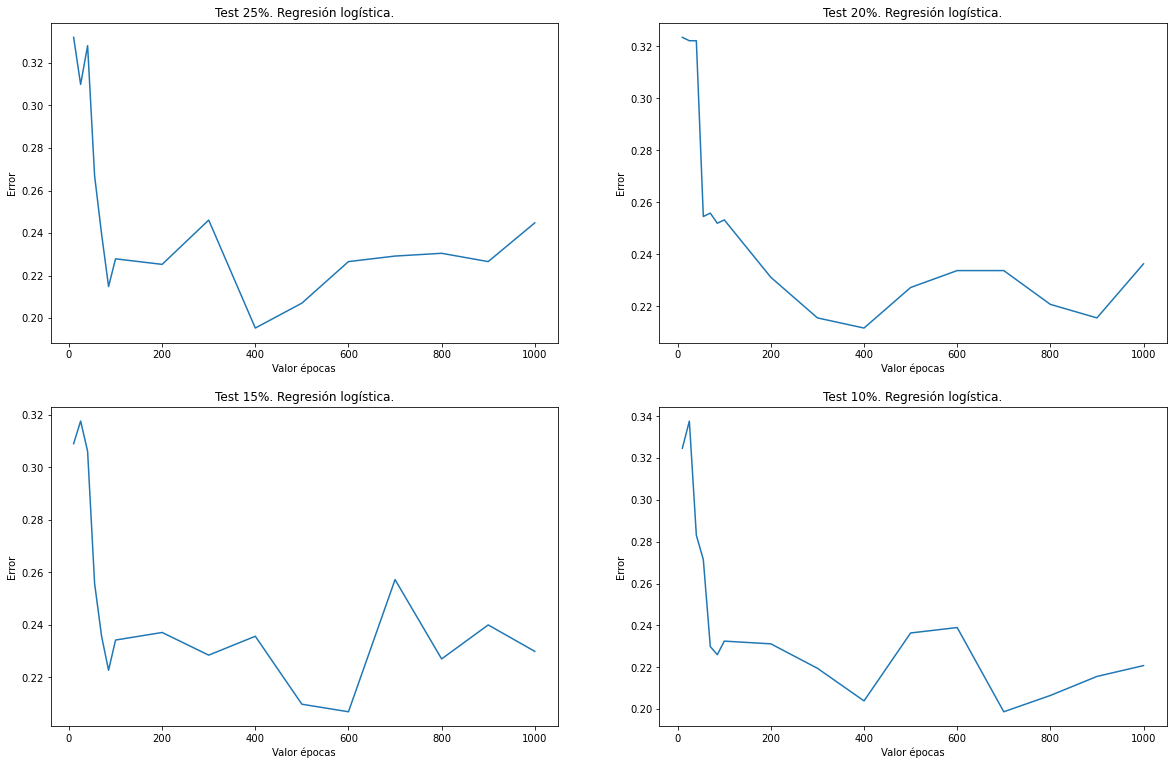

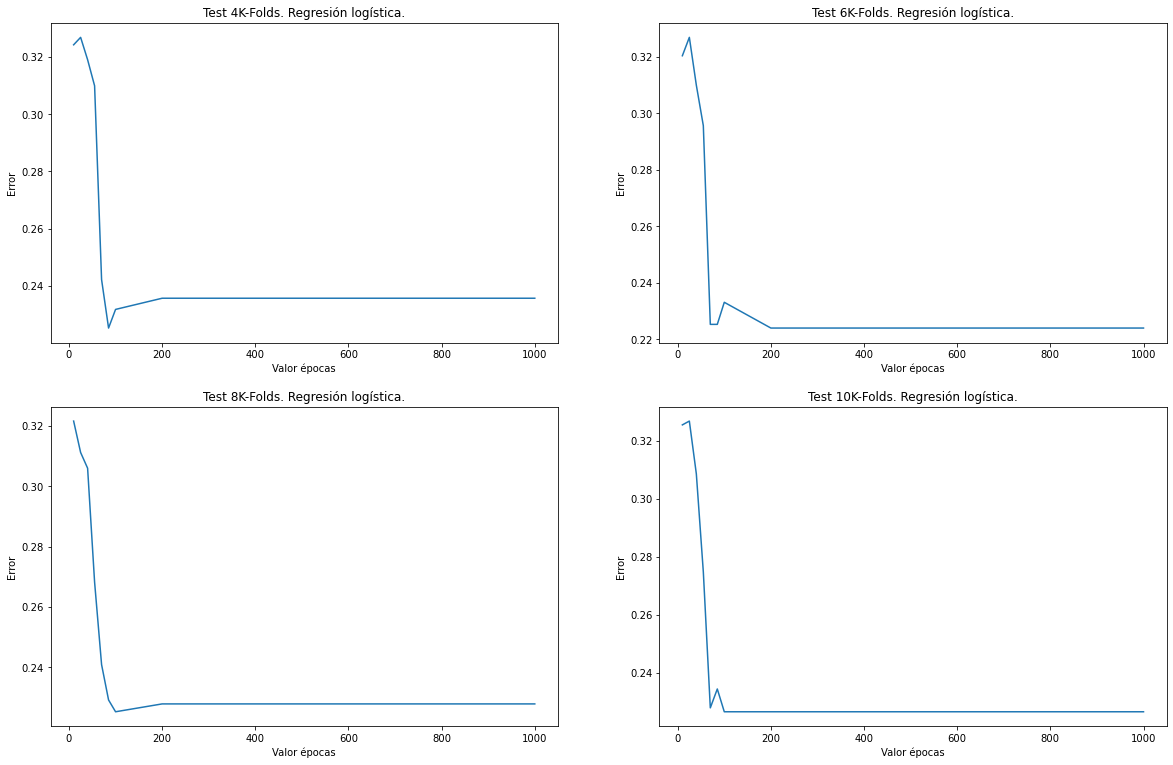

In [17]:
utils.plot_logistic(errorMedioPimaVS_logistic, True)
utils.plot_logistic(errorMedioPimaVC_logistic, False)

#### 2.1.2 *LogisticRegression WDBC*

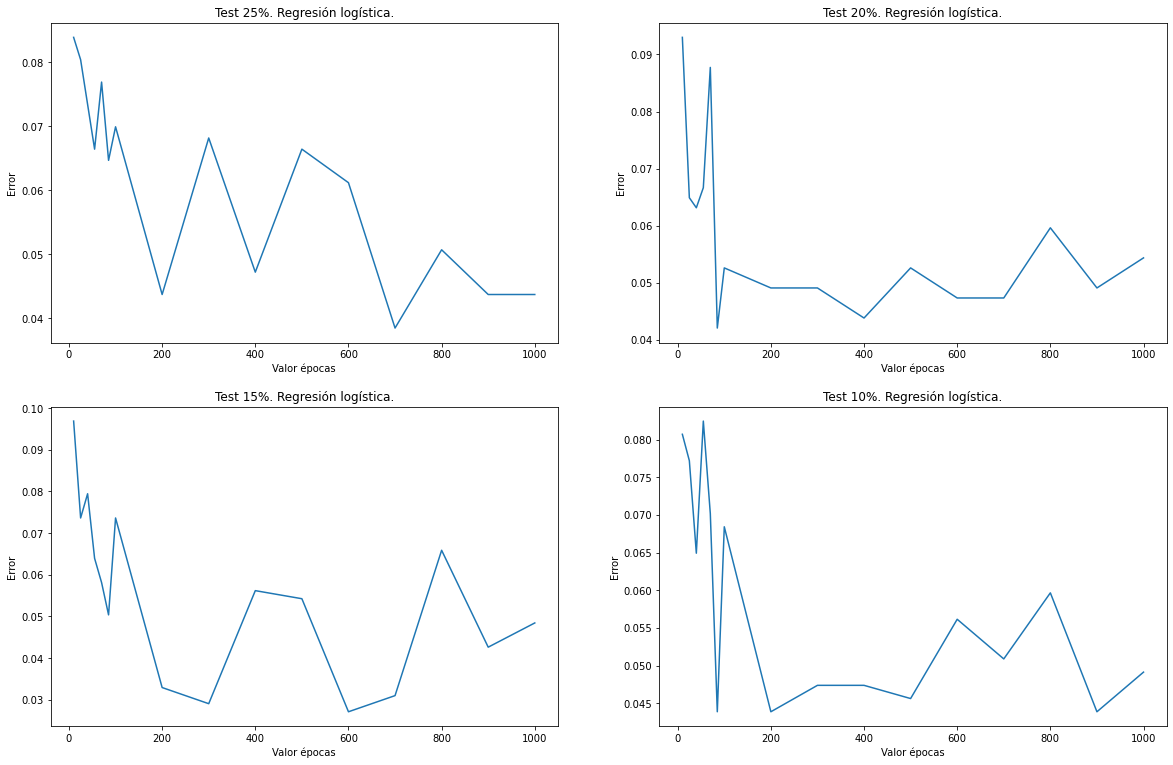

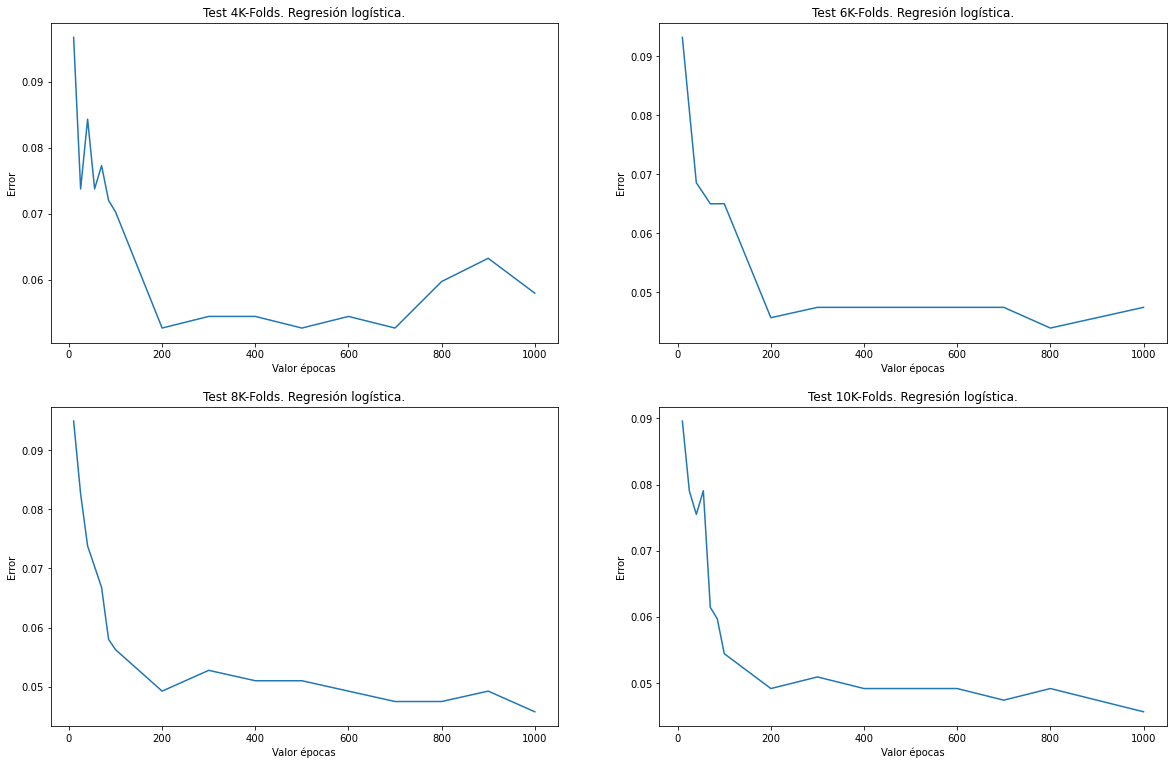

In [18]:
utils.plot_logistic(errorMedioWDBCVS_logistic, True)
utils.plot_logistic(errorMedioWDBCVC_logistic, False)

Lo primero que podemos ver aquí, es el claro descenso que hay al aumentar el número de épocas. Esto refuerza la teoría de que pocas épocas resultan poco beneficiosas. Otra cosa que se puede ver es como hay una época en la cual el error deja de descender drásticamente, **no son necesarias más épocas a partir de esa**. En el dataset de *Pima-Indians-Diabetes* este número está alrededor de **400** (en la validación simple) y **200** (en la validación cruzada). 
#### 2.1.1.1 *SGBD Classifier Pima-Indians-Diabetes* Cte. aprendizaje=0.5

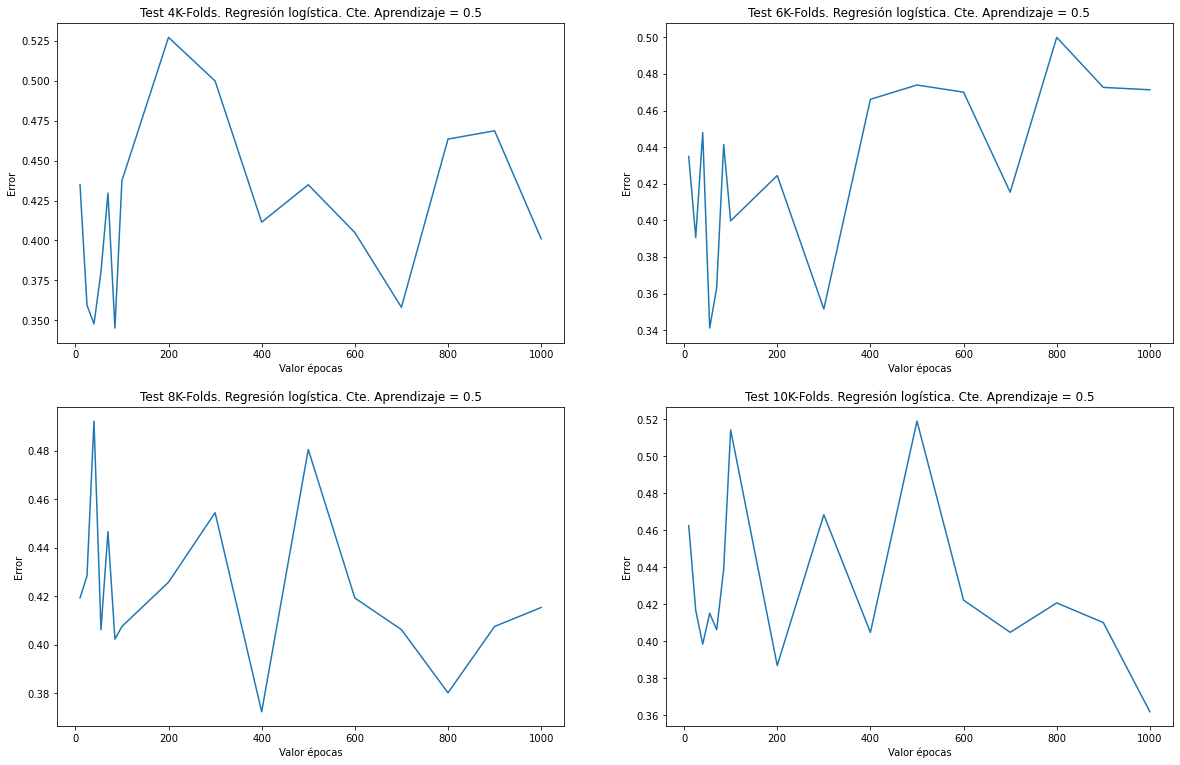

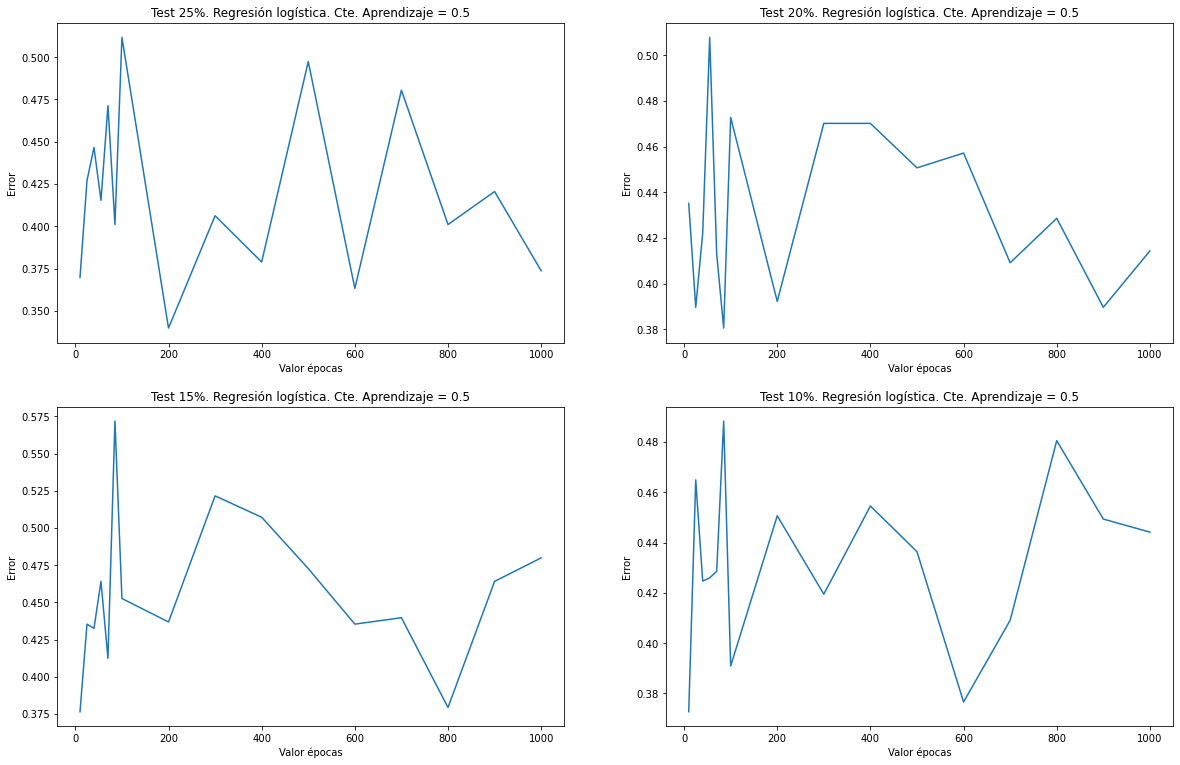

In [19]:
utils.plot_epoch(errorMedioPimaVC_SGBD, 0.5, False)
utils.plot_epoch(errorMedioPimaVS_SGBD, 0.5, True)

#### 2.1.1.2 *SGBD Classifier  Pima-Indians-Diabetes* Cte. aprendizaje=1.0

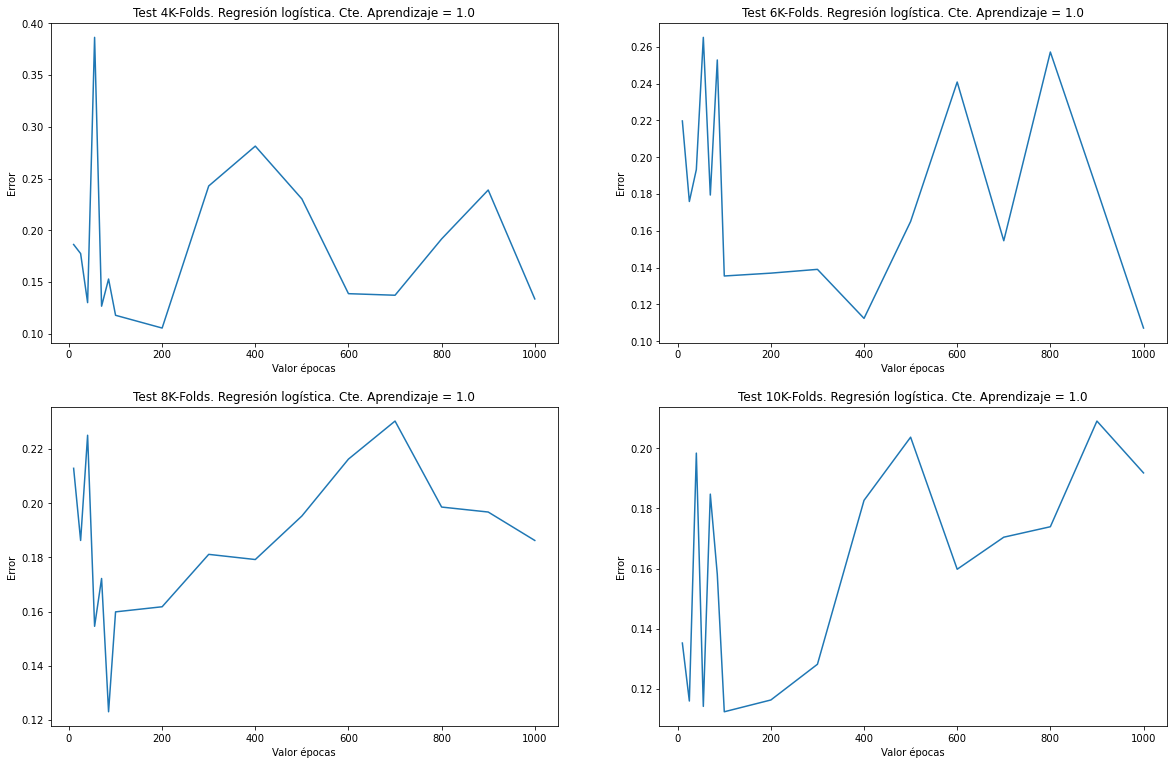

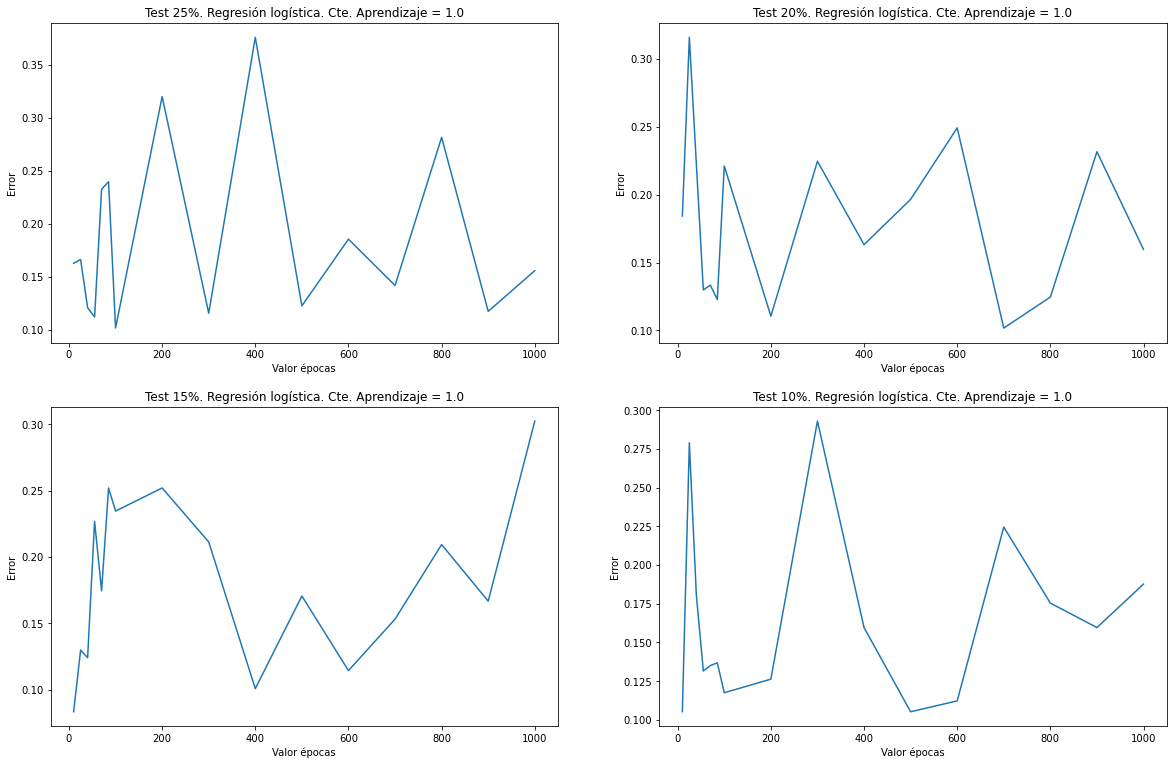

In [20]:
utils.plot_epoch(errorMedioWDBCVC_SGBD, 1.0, False)
utils.plot_epoch(errorMedioWDBCVS_SGBD, 1.0, True)

#### 2.1.1.3 *SGBD Classifier  Pima-Indians-Diabetes* Cte. aprendizaje=1.5

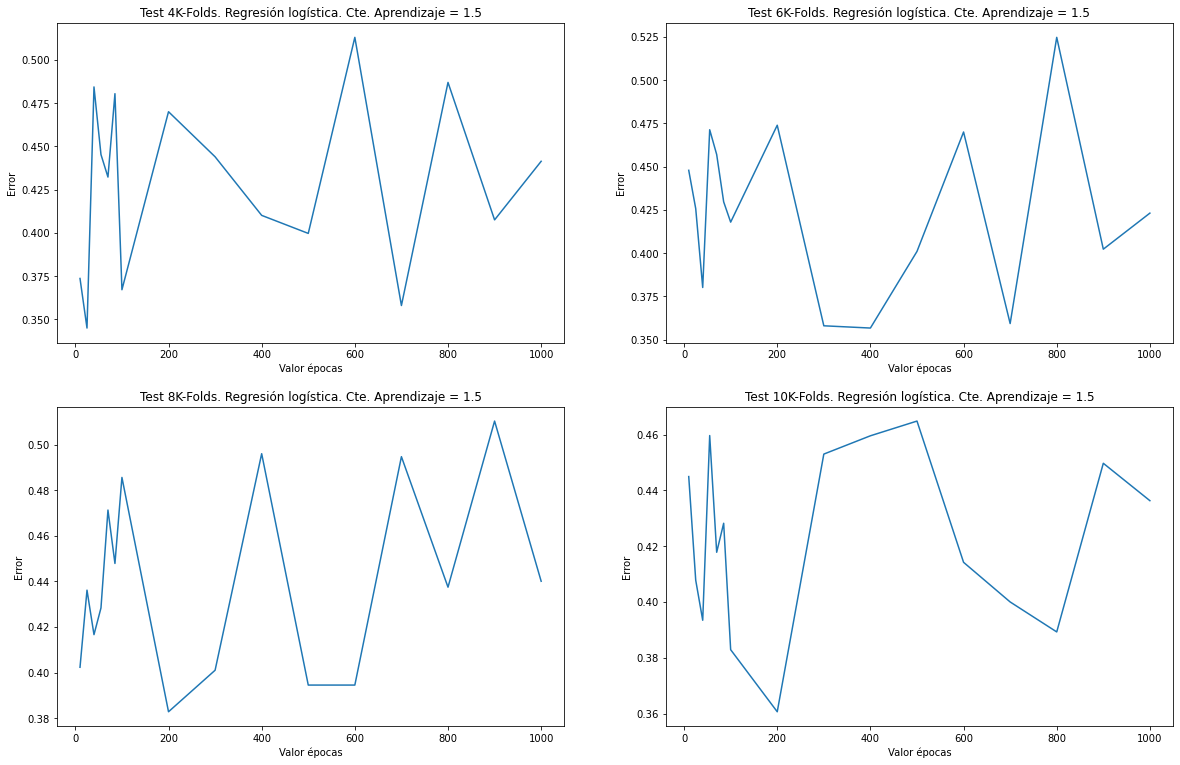

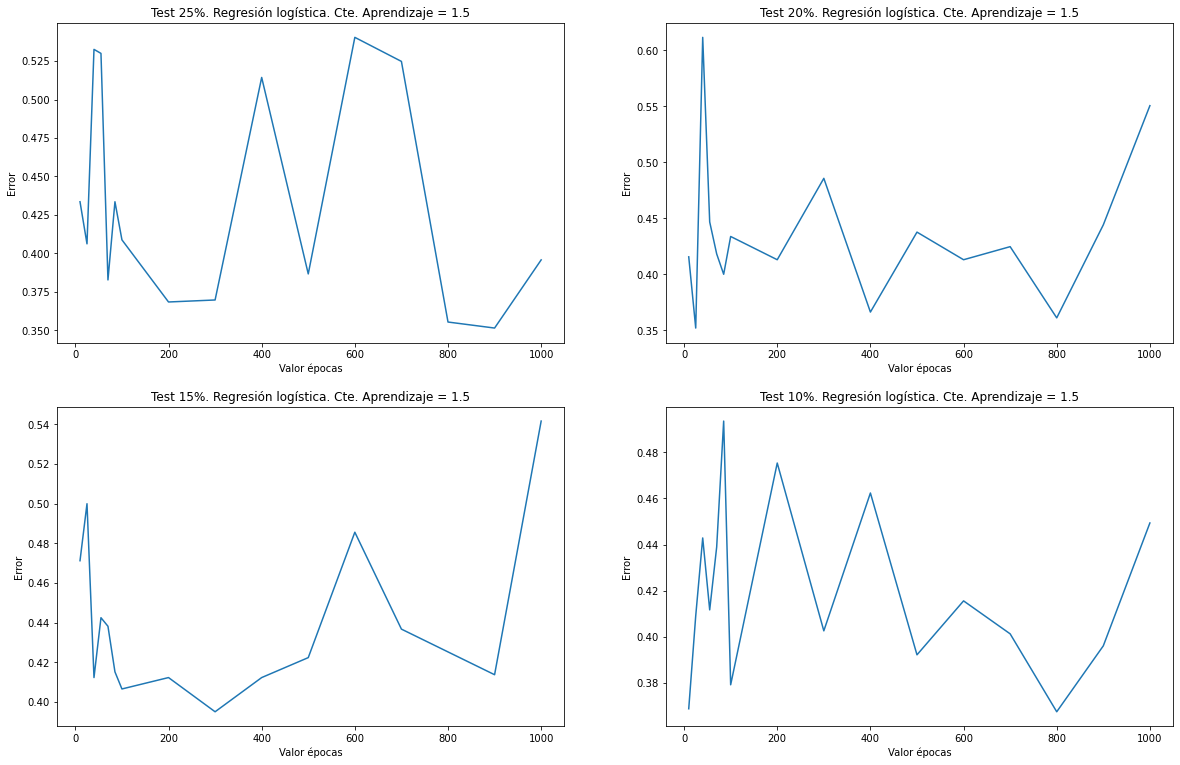

In [21]:
utils.plot_epoch(errorMedioPimaVC_SGBD, 1.5, False)
utils.plot_epoch(errorMedioPimaVS_SGBD, 1.5, True)

#### 2.1.1.4 *SGBD Classifier  Pima-Indians-Diabetes* Cte. aprendizaje=2.0

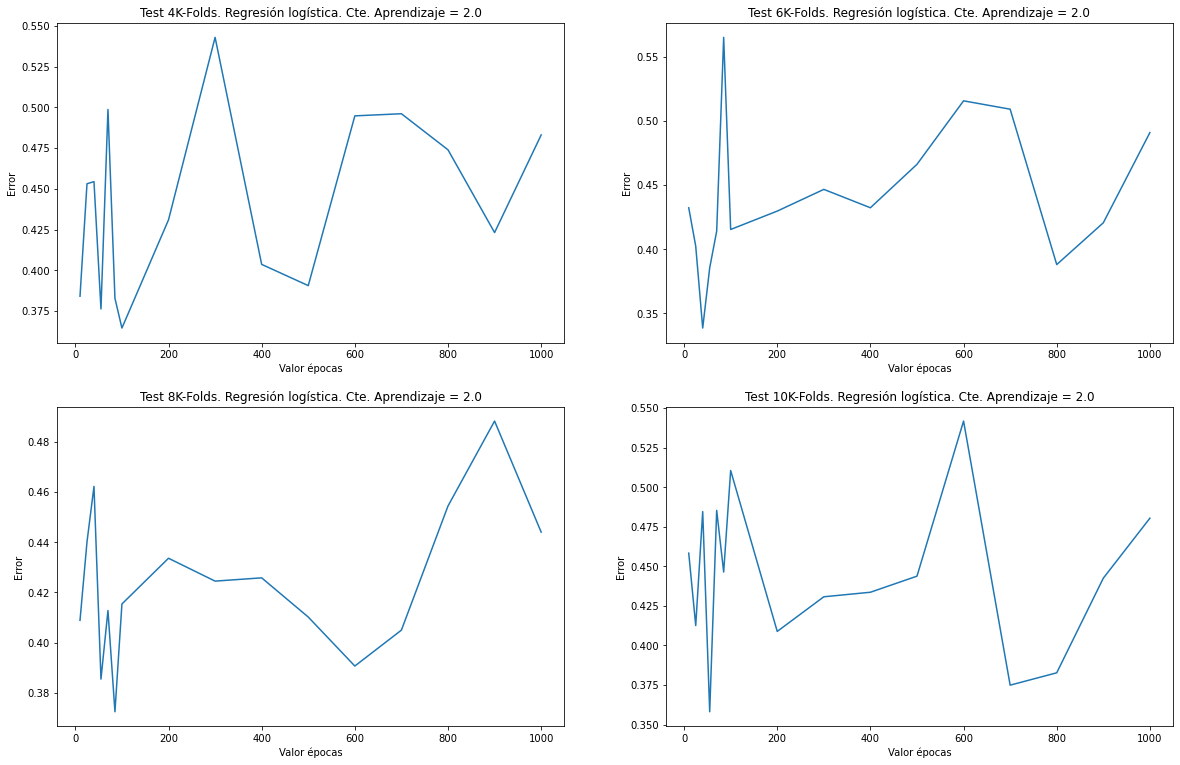

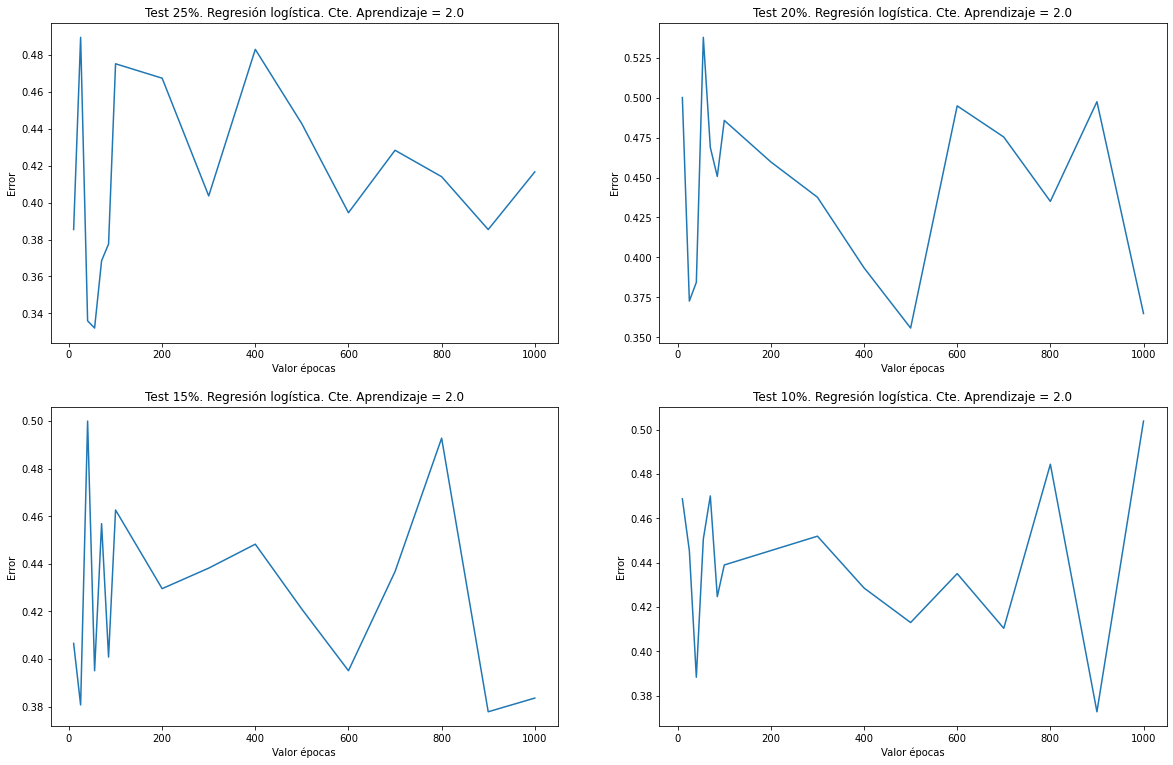

In [22]:
utils.plot_epoch(errorMedioPimaVC_SGBD, 2.0, False)
utils.plot_epoch(errorMedioPimaVS_SGBD, 2.0, True)

#### 2.1.2.1 *SGBD Classifier WDBC* Cte. aprendizaje=0.5

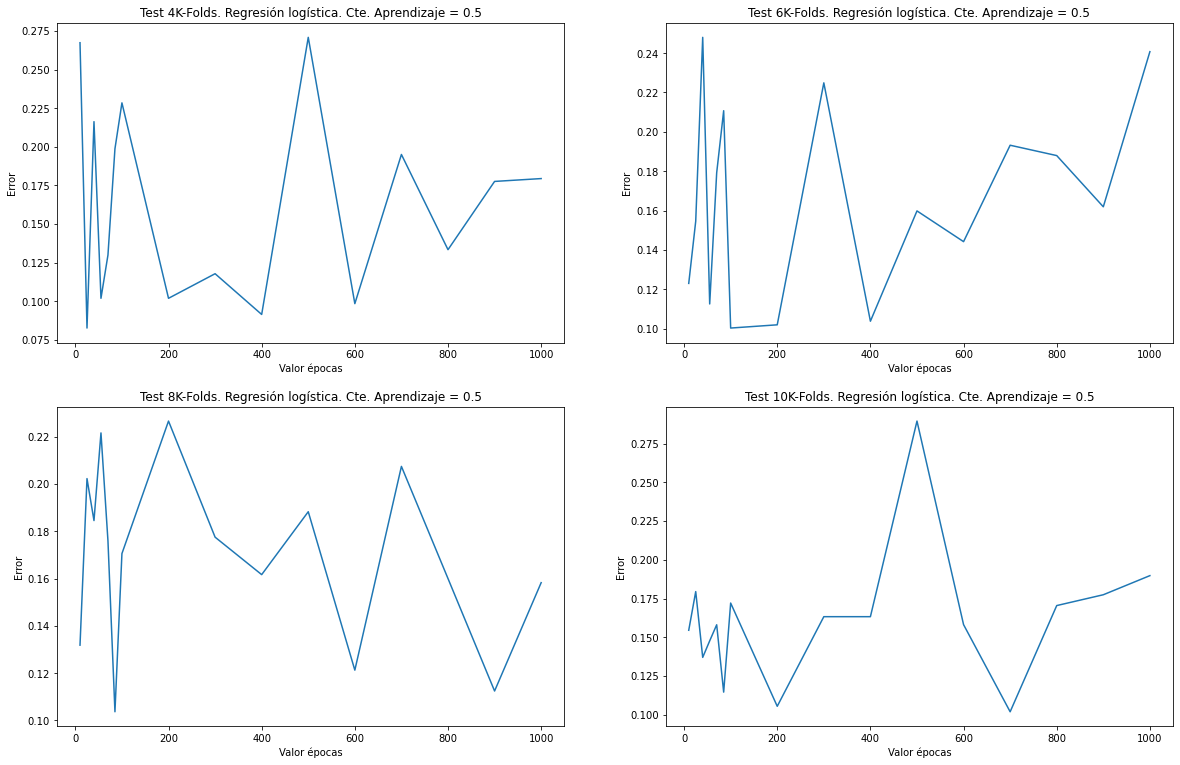

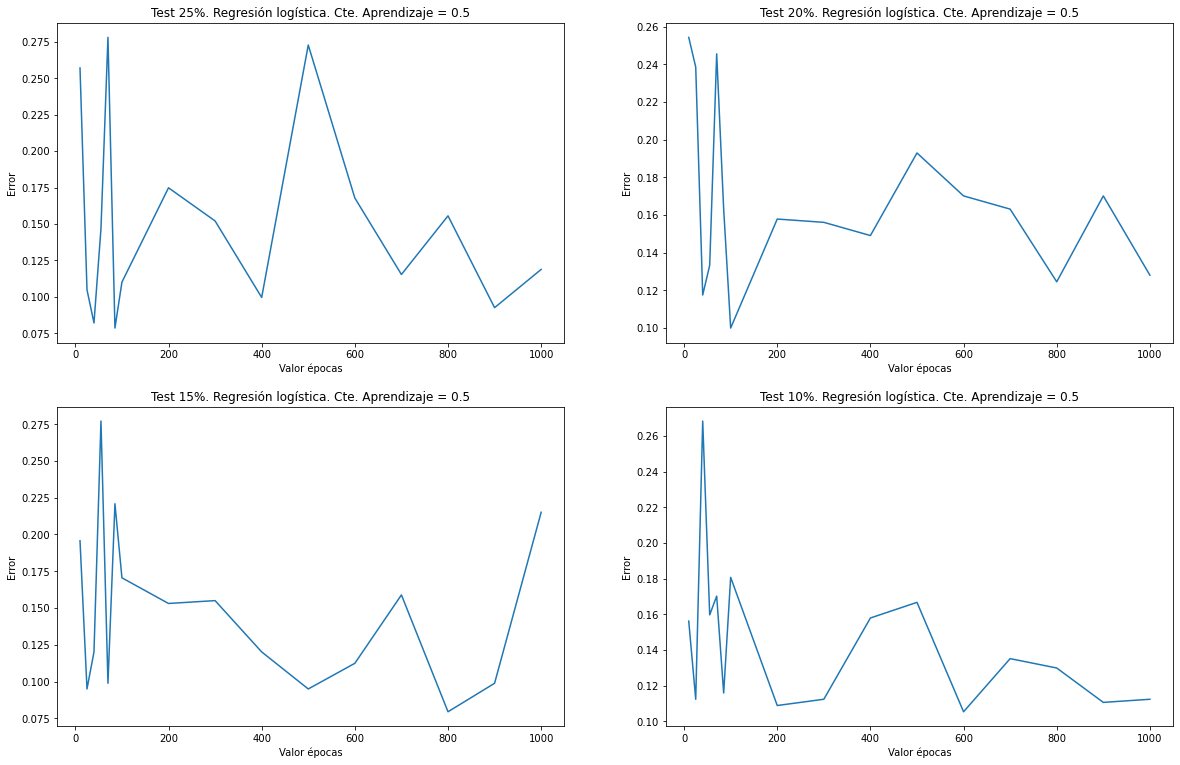

In [23]:
utils.plot_epoch(errorMedioWDBCVC_SGBD, 0.5, False)
utils.plot_epoch(errorMedioWDBCVS_SGBD, 0.5, True)

#### 2.1.2.2 *SGBD Classifier WDBC* Cte. aprendizaje=1.0

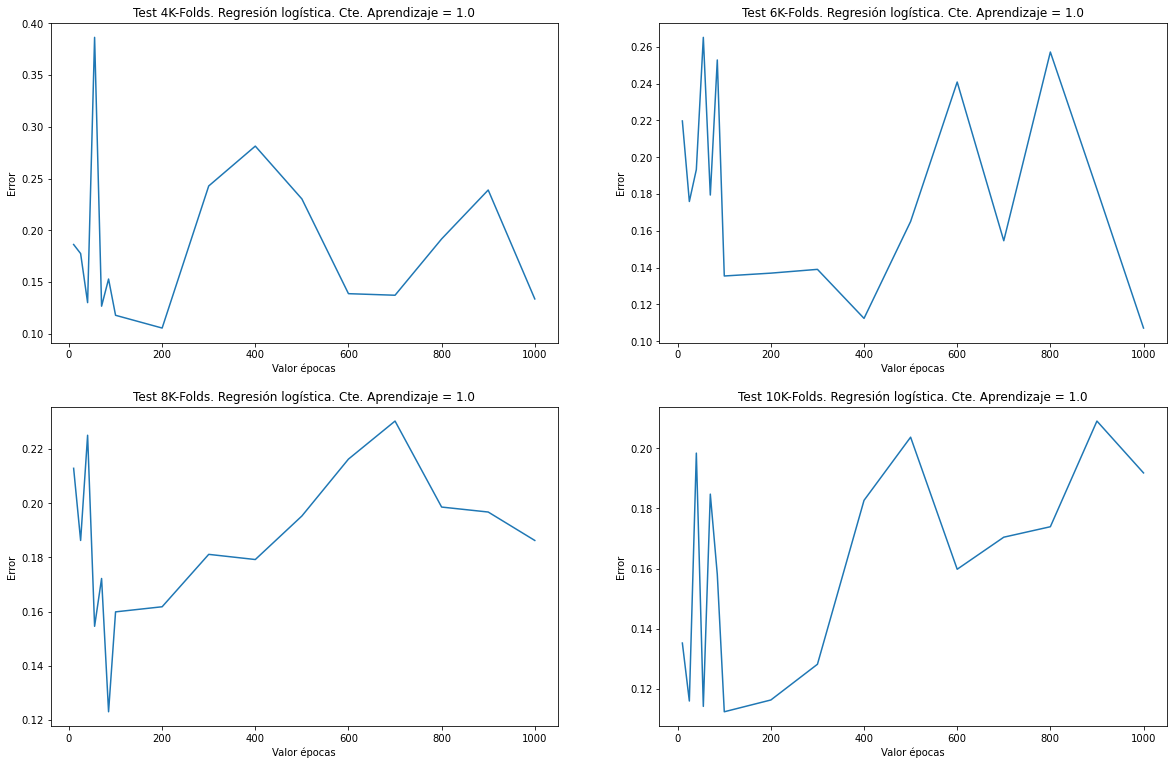

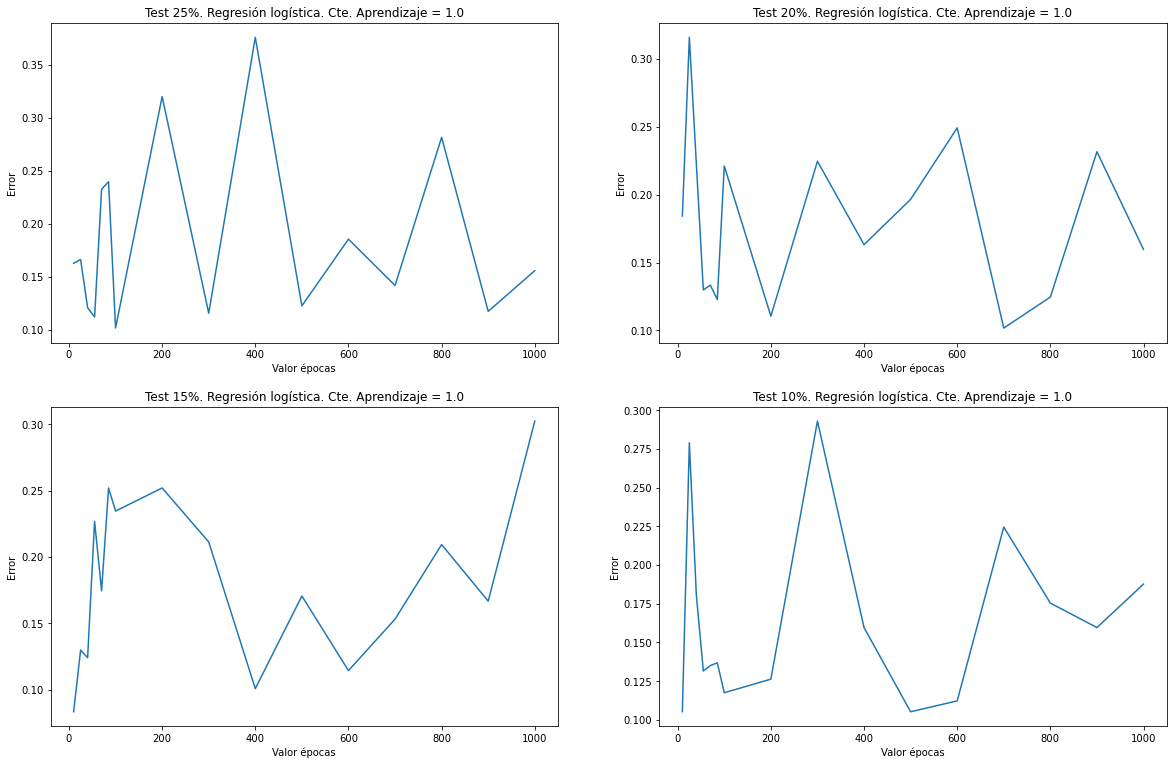

In [24]:
utils.plot_epoch(errorMedioWDBCVC_SGBD, 1.0, False)
utils.plot_epoch(errorMedioWDBCVS_SGBD, 1.0, True)

#### 2.1.2.3 *SGBD Classifier WDBC* Cte. aprendizaje=1.5

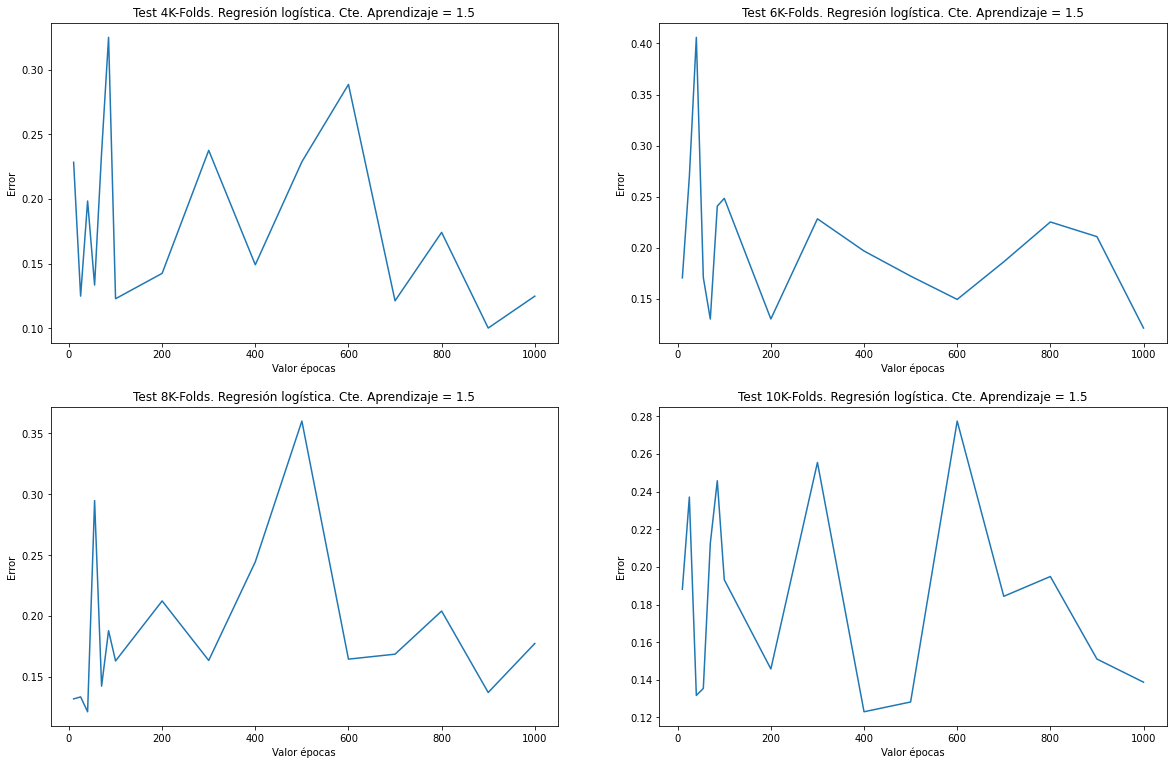

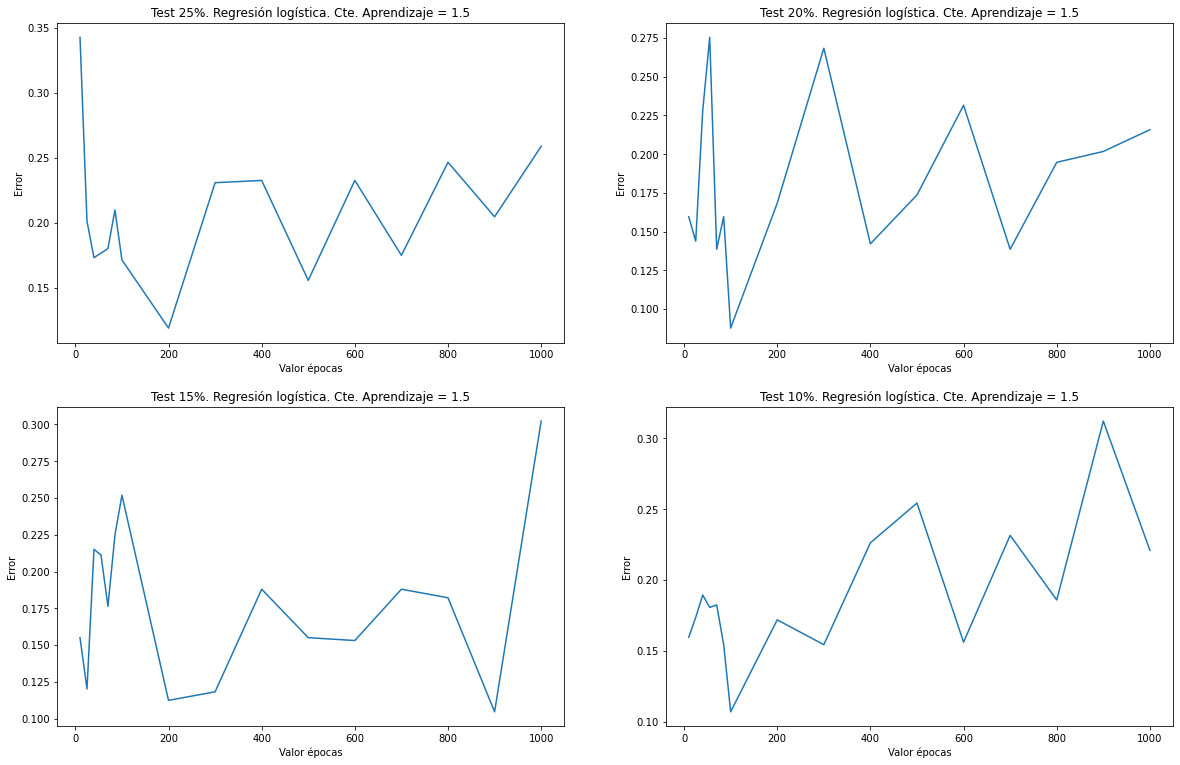

In [25]:
utils.plot_epoch(errorMedioWDBCVC_SGBD, 1.5, False)
utils.plot_epoch(errorMedioWDBCVS_SGBD, 1.5, True)

#### 2.1.2.4 *SGBD Classifier WDBC* Cte. aprendizaje=2.0

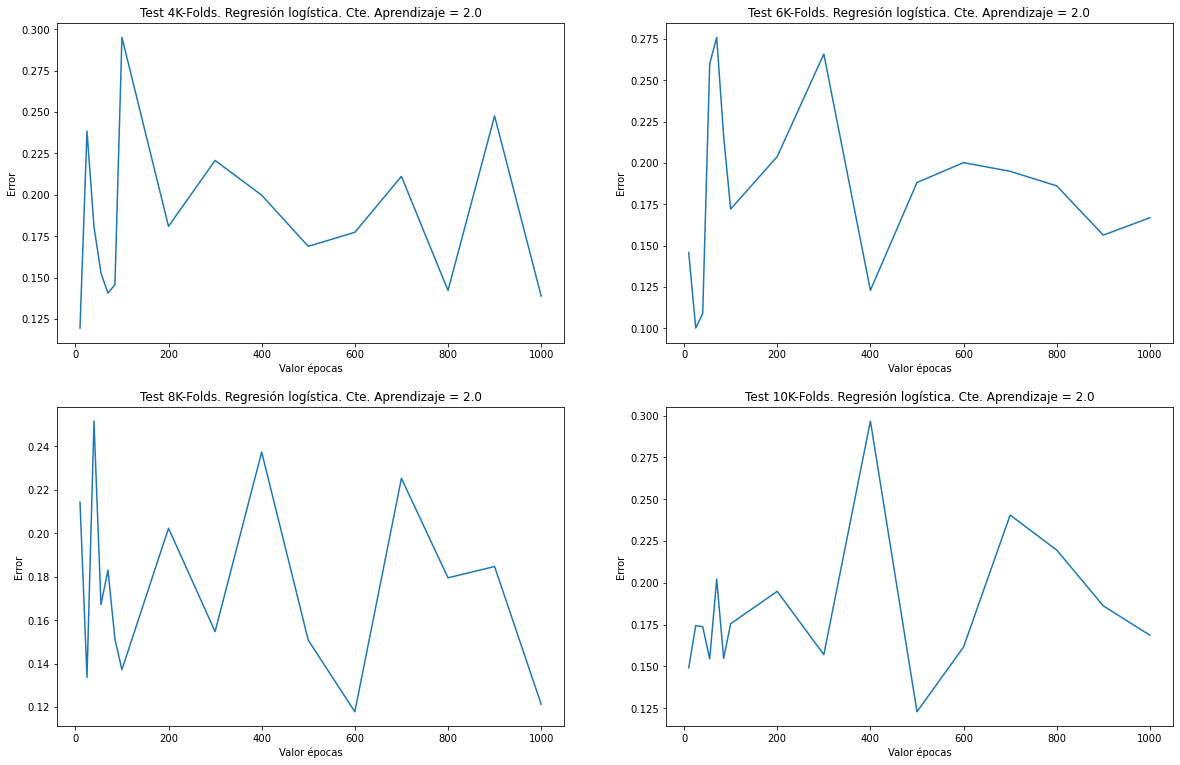

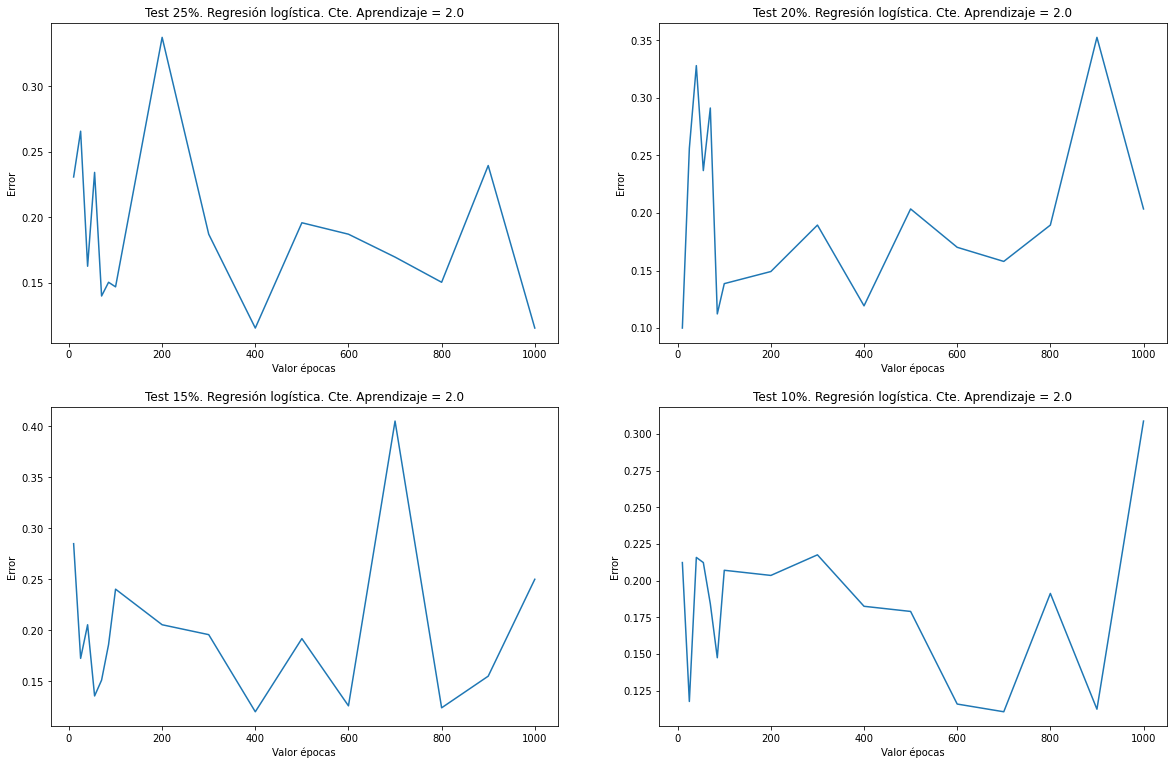

In [26]:
utils.plot_epoch(errorMedioWDBCVC_SGBD, 2.0, False)
utils.plot_epoch(errorMedioWDBCVS_SGBD, 2.0, True)

*SGDClassifier* presenta unos datos muy parejos al modelo implementado en la práctica. Se repiten fenómenos como en el que el error tiene varios repuntes y no parece haber ningún número de épocas claro donde el error descienda.

### 2.2 Efecto de la constante de aprendizaje.
Ahora veremos como se desarrolla el error en base al valor que se le da a la constante de aprendizaje. Para esto se usará un determinado número de épocas (donde se da un menor error), de esta forma se vera el impacto de la cte.

Como con *LogisticRegression* no podemos establecer el aprendizaje **unicamente se mostrarán los datos con el clasificador SGD**.
#### 2.2.1 *SGD Classifier Pima-Indians-Diabetes*

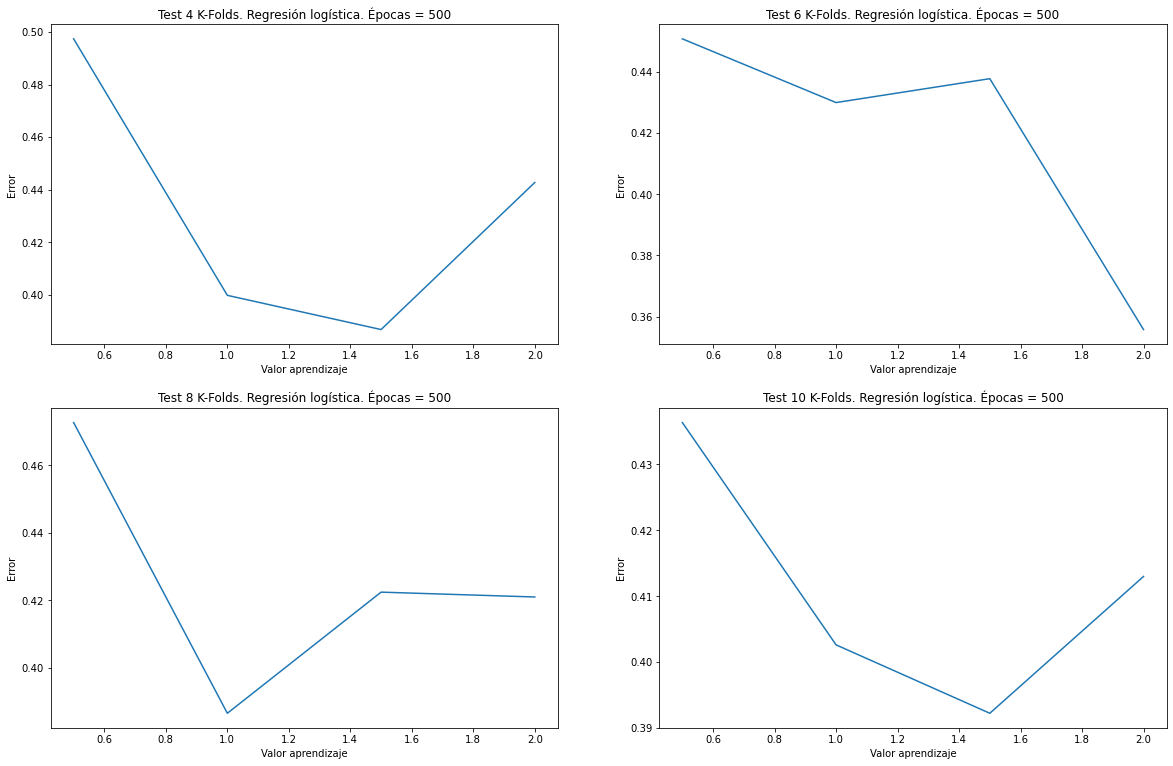

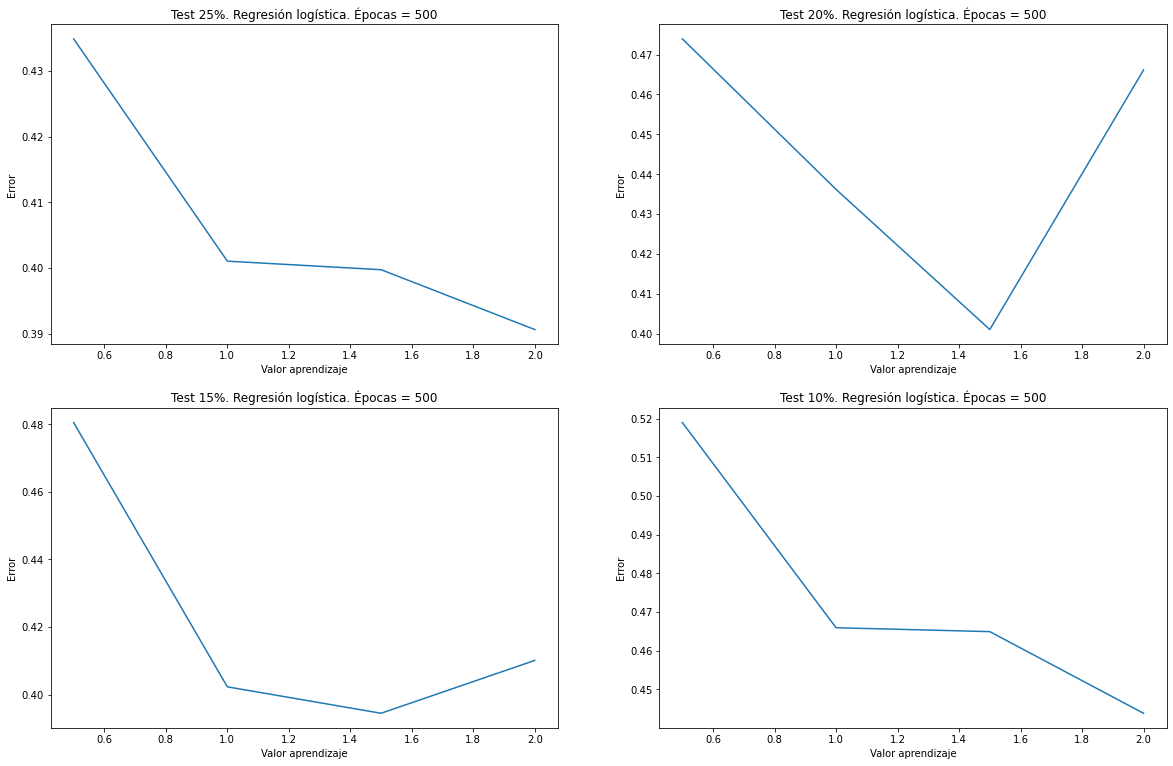

In [27]:
utils.plot_aprendizaje(errorMedioPimaVS_SGBD, 500, False)
utils.plot_aprendizaje(errorMedioPimaVC_SGBD, 500, True)

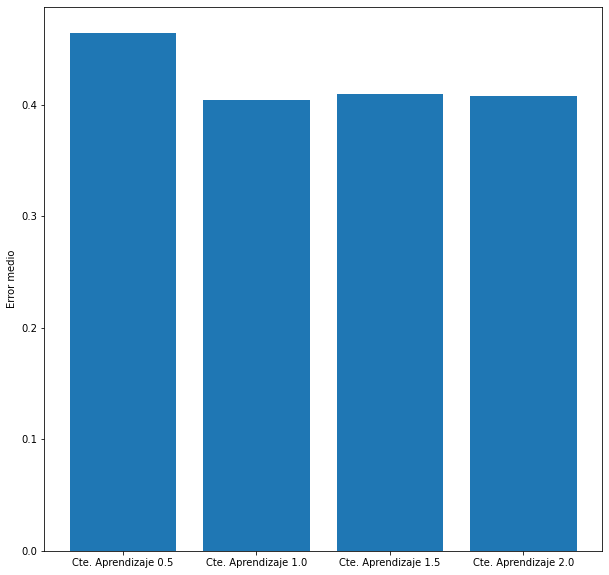

In [28]:
datos = (errorMedioPimaVS_SGBD, errorMedioPimaVS_SGBD)
utils.plot_histograms(datos, 500)

En este dataset parece haber una disminución del error a medida que se aumenta la constante de aprendizaje.
#### 2.2.2 *SGBD Classifier WDBC*

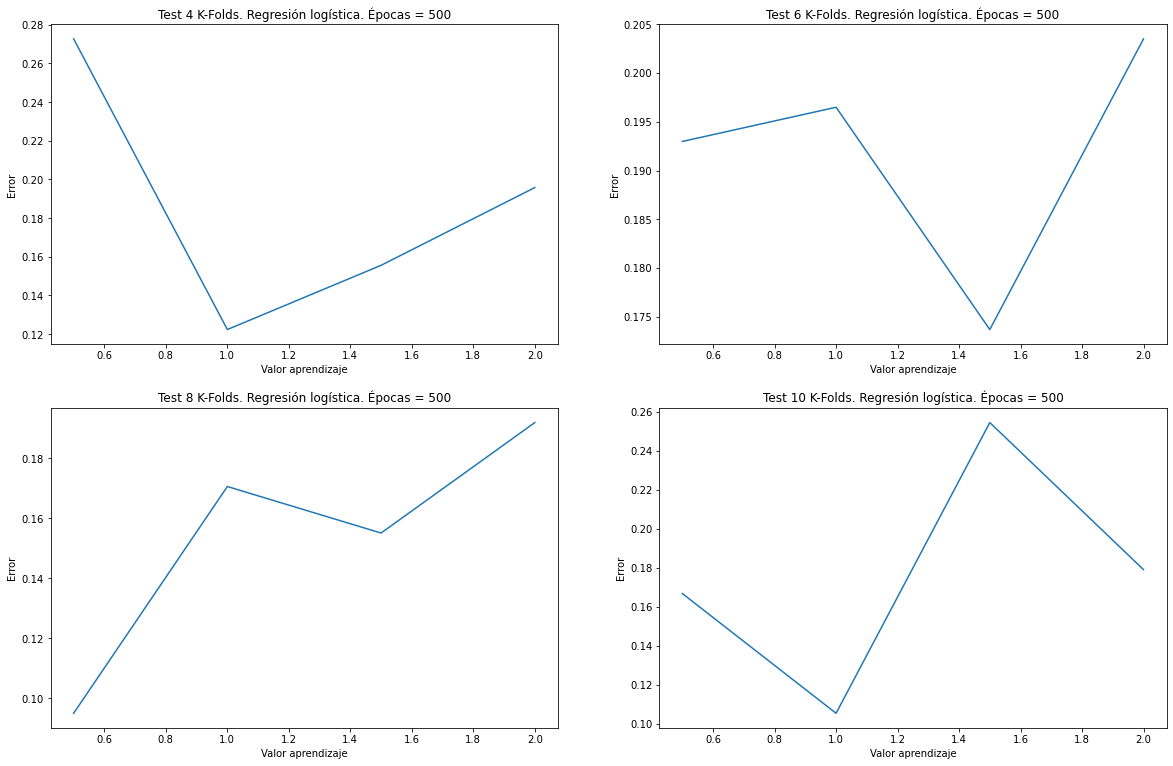

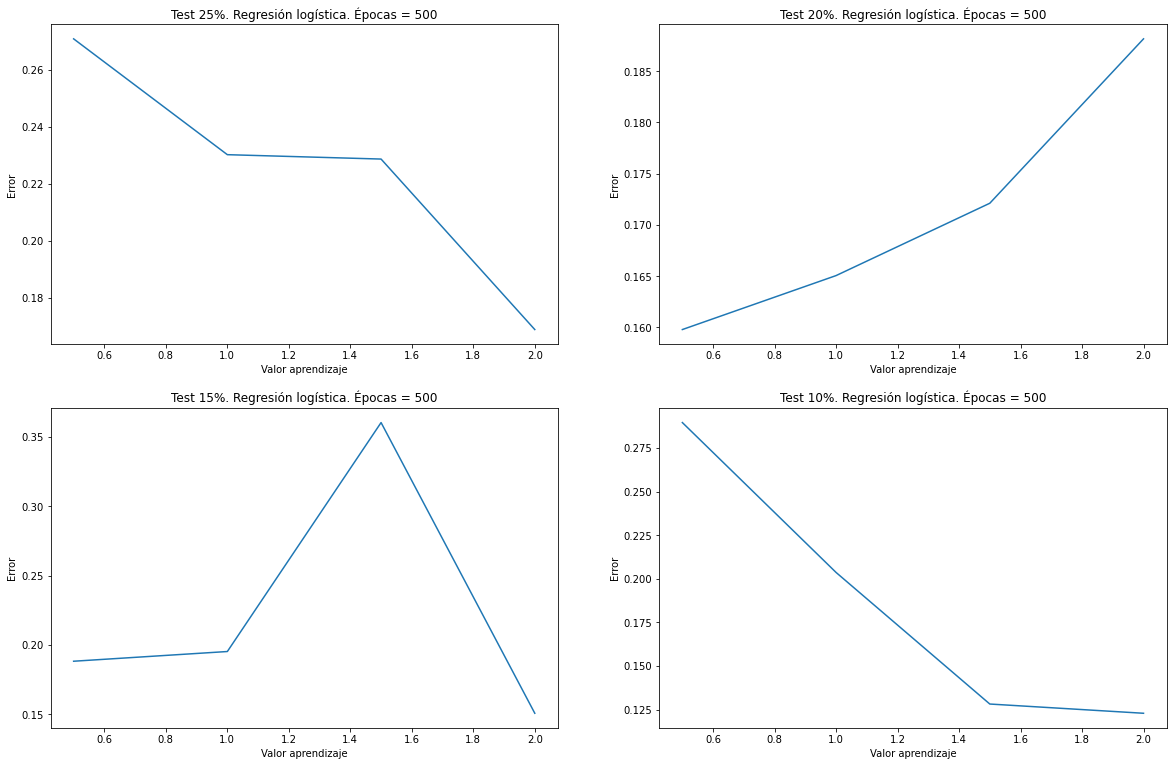

In [29]:
utils.plot_aprendizaje(errorMedioWDBCVS_SGBD, 500, False)
utils.plot_aprendizaje(errorMedioWDBCVC_SGBD, 500, True)

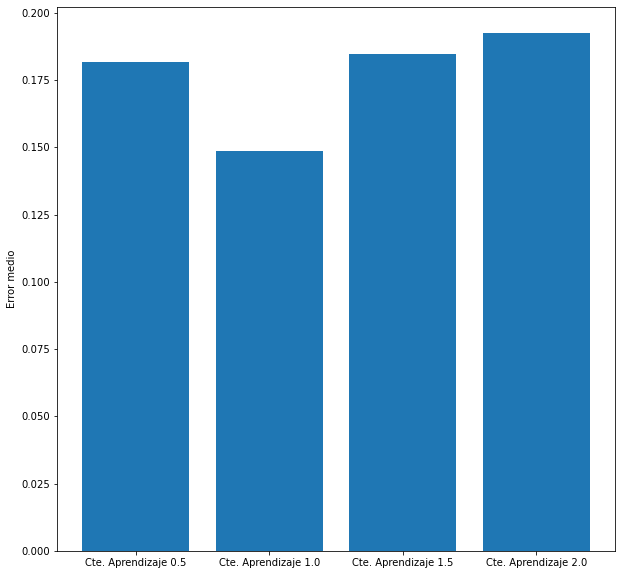

In [30]:
datos = (errorMedioWDBCVS_SGBD, errorMedioWDBCVS_SGBD)
utils.plot_histograms(datos, 500)

A diferencia del dataset anterior podemos ver que la constante de aprendizaje no es un valor que marque la diferencia, el error en todos los casos es muy parejo. En esta ejecución a dado la casualidad de que el valor 1.0 es el que mejor comportamiento presenta, pero esto no siempre es así.

### 2.3 Comparación implementación SKLearn e implementación propia
Como *LogisticRegression* no tiene un parametro de cte. aprendizaje, los datos de este no cambian, pero los de los demás modelos sí.
#### 2.3.1 *Pima-Indians-diabetes*

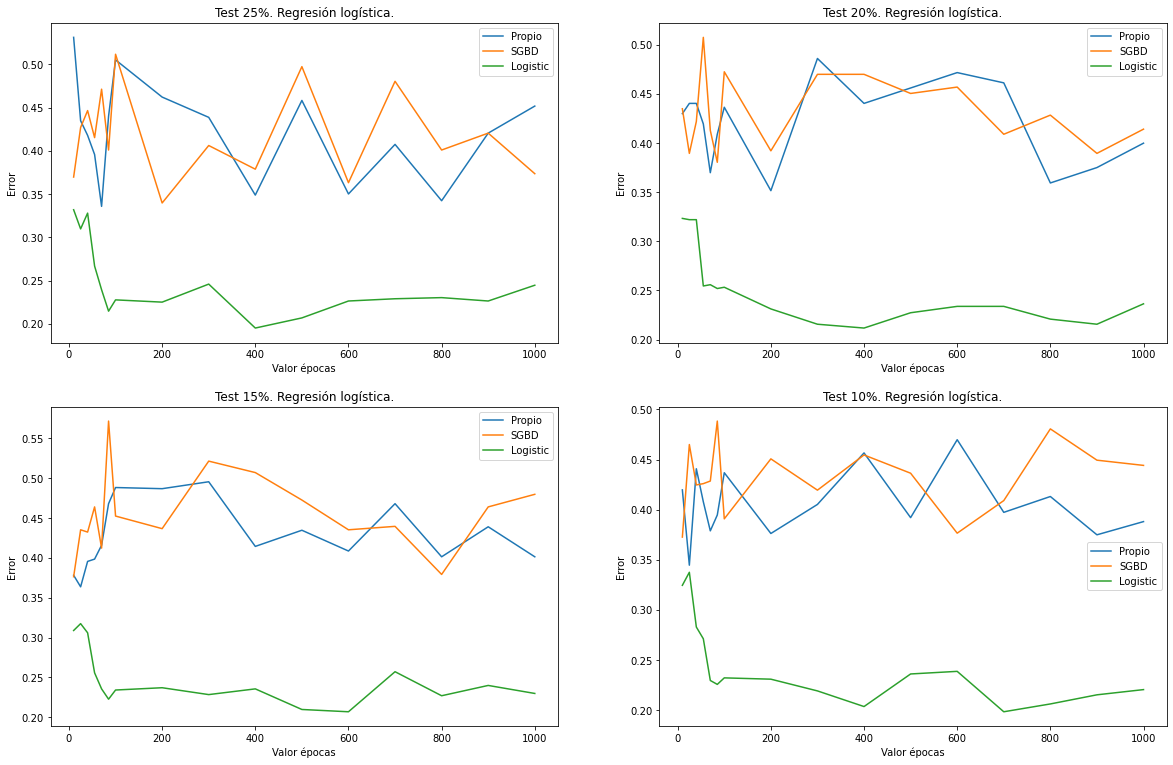

In [31]:
datos = (errorMedioPimaVS, errorMedioPimaVS_SGBD, errorMedioPimaVS_logistic)
labels = ["Propio", "SGBD", "Logistic"] 

utils.plot_VS_all(datos, 0.5, True, labels)

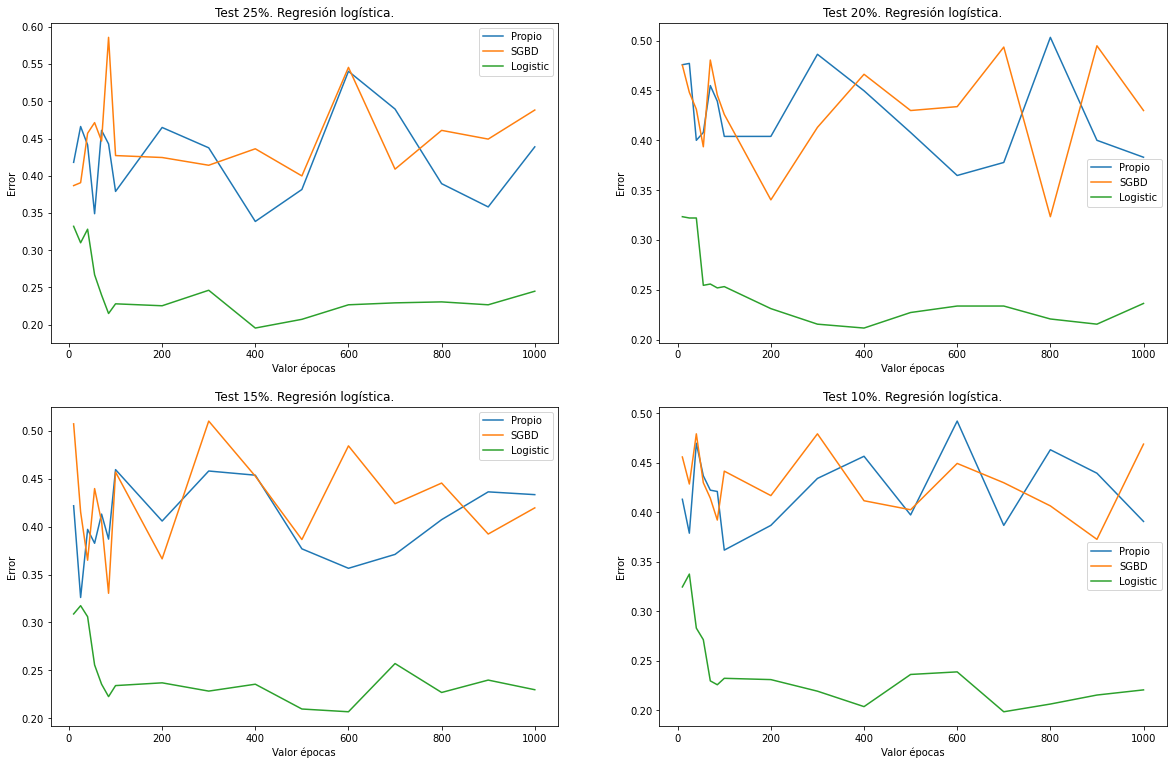

In [32]:
utils.plot_VS_all(datos, 1.0, True, labels)

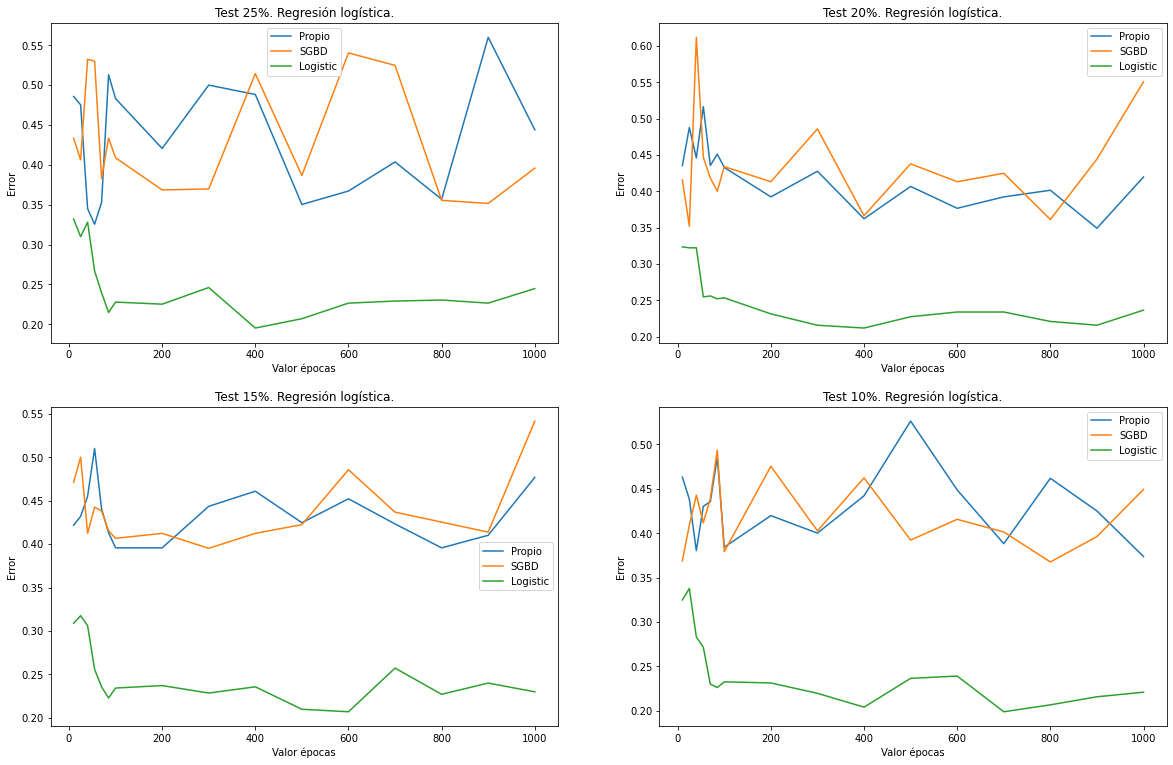

In [33]:
utils.plot_VS_all(datos, 1.5, True, labels)

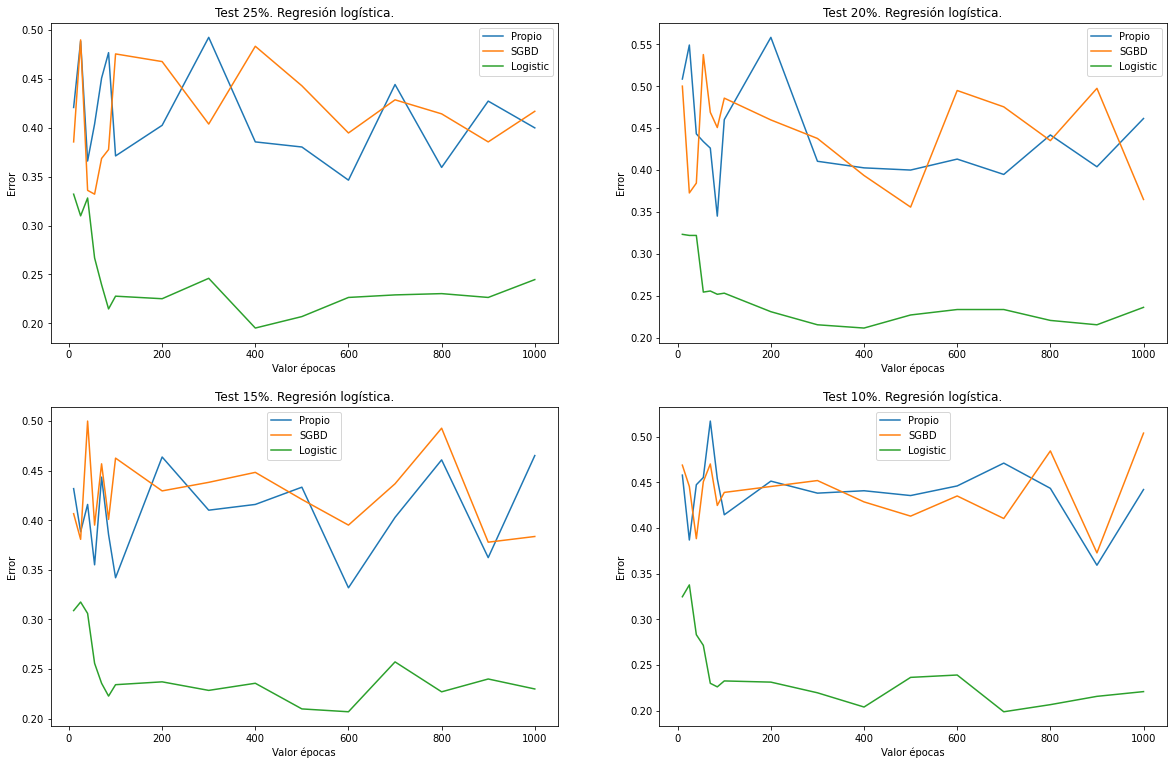

In [34]:
utils.plot_VS_all(datos, 2.0, True, labels)

Con estas primeras gráficas podemos ver la superioridad de *LogisticRegression*, el error es inferior en todos y cada uno de los casos, incluso con 10 épocas de entrenamiento tiene menos errores que los otros modelos con [100-1000] épocas.

Podemos ver que el modelo propio y *SGDClassifier* son muy parejos y presentan un comportamiento muy similar.
#### 2.3.2 *WDBC*

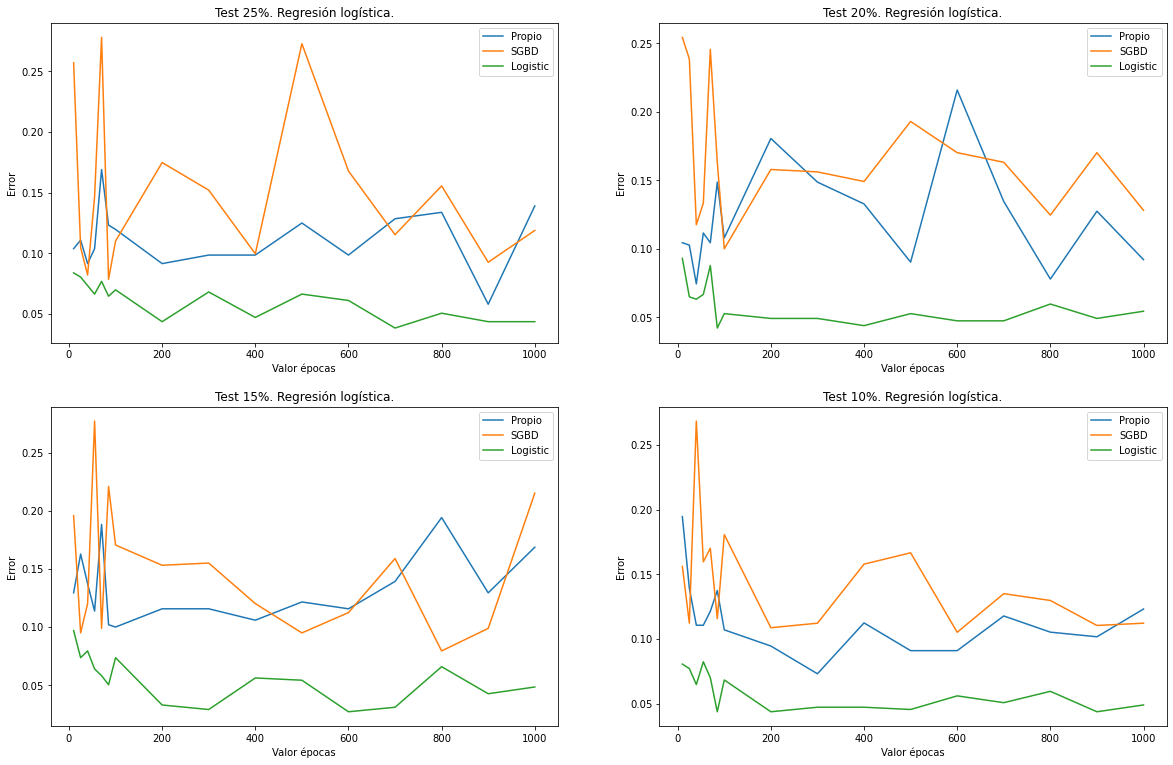

In [35]:
datos = (errorMedioWDBCVS, errorMedioWDBCVS_SGBD, errorMedioWDBCVS_logistic)
utils.plot_VS_all(datos, 0.5, True, labels)

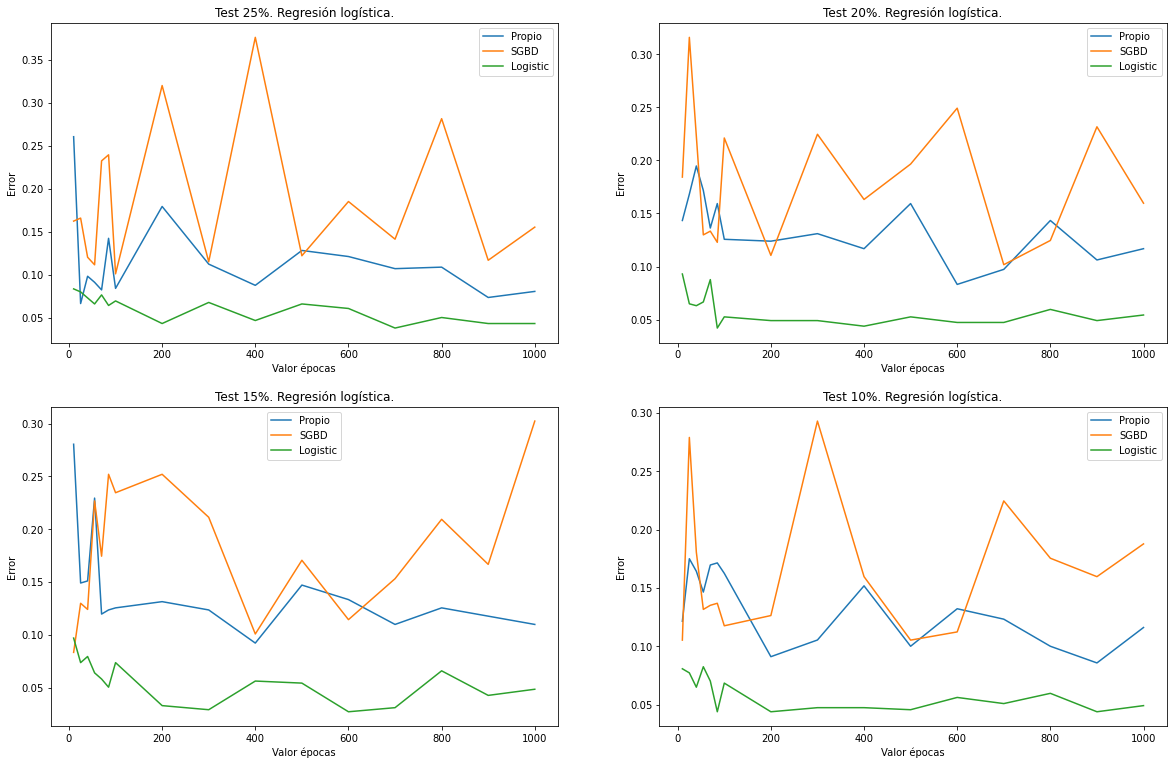

In [36]:
utils.plot_VS_all(datos, 1.0, True, labels)

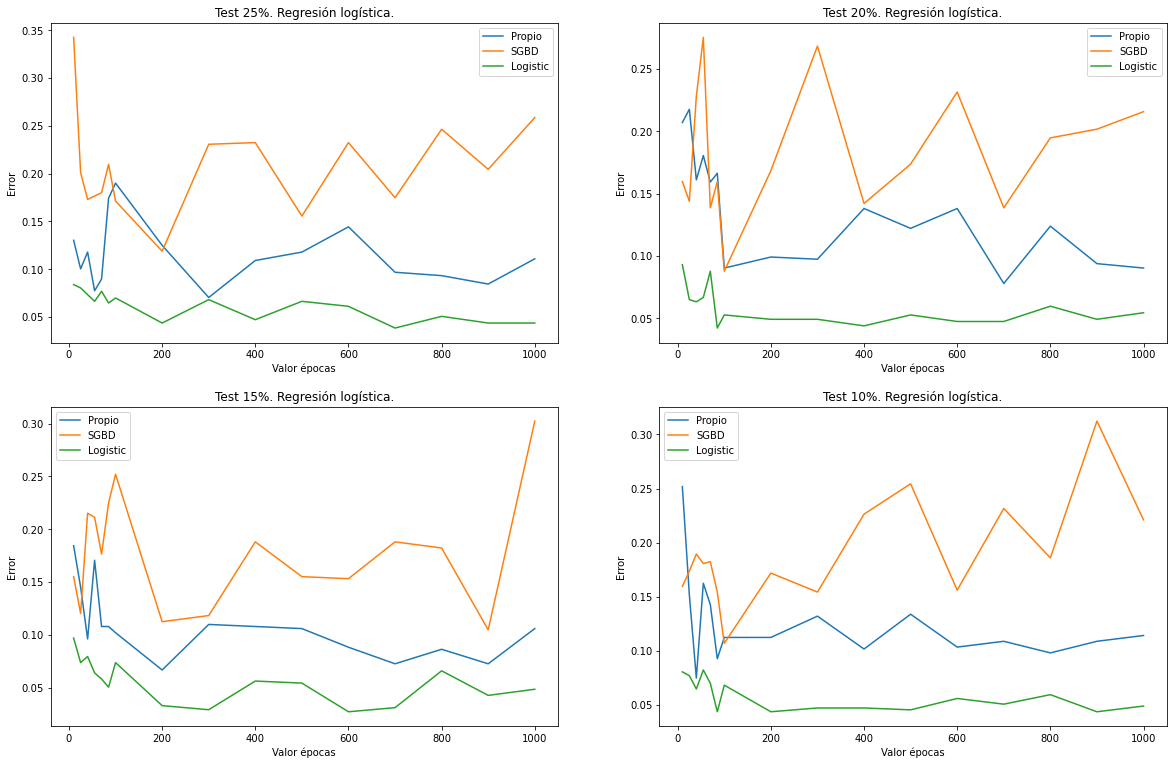

In [37]:
utils.plot_VS_all(datos, 1.5, True, labels)

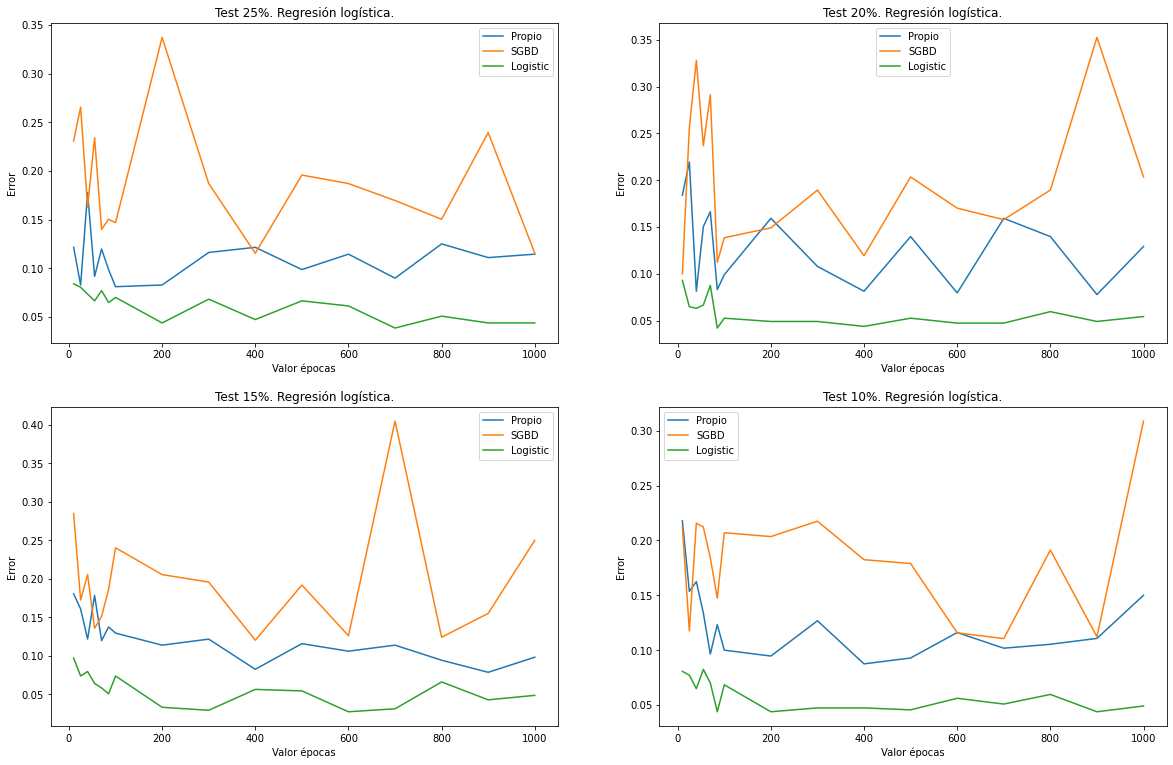

In [38]:
utils.plot_VS_all(datos, 2.0, True, labels)

En este dataset podemos ver que *LogisticRegression* sigue siendo superior, en todos los casos. También podemos ver que aquí *SGDClassifier* tiene el peor comportamiento de todos, teniendo varios repuntes y los valores del error más alto.

## 3. Análisis ROC
A continuación se mostrarán los espacios ROC de cada conjunto de datos


In [39]:
from Distancias import distanciaEuclidea

# Configuraciones de los modelos
RL_conf = (1, 1000) # cte. aprendizaje, épocas
KNN_conf = (11, distanciaEuclidea) # K, funcion distancia

### 3.1 *Pima-Indians-Diabetes*

<Figure size 720x720 with 0 Axes>

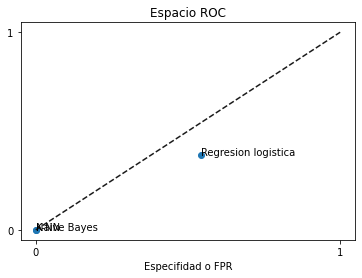

In [40]:
utils.plot_espacio_ROC(pima, 10, 20, RL_conf, KNN_conf)

### 3.2 *WDBC*

<Figure size 720x720 with 0 Axes>

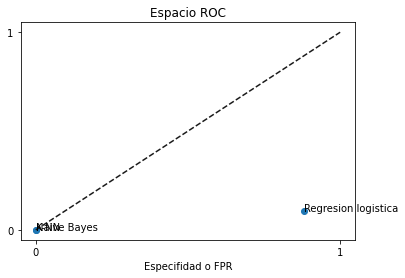

In [41]:
utils.plot_espacio_ROC(wdbc, 10, 20, RL_conf, KNN_conf)

Imagino que debe haber algun error en la implementación del espacio ROC, ya que independientemente de las veces que ejecutase esta función siempre obtenía un resultado similar.

A la única conclusión a la que se puede llegar es que la regresión logística da más falsos positivos que verdaderos positivos.

## 4. Curva ROC
En este último apartado vamos a mostrar y discutir la curva ROC generada con el clasificador de *Regresión Logística*.
### 4.1 *Pima-Indians-Diabetes*

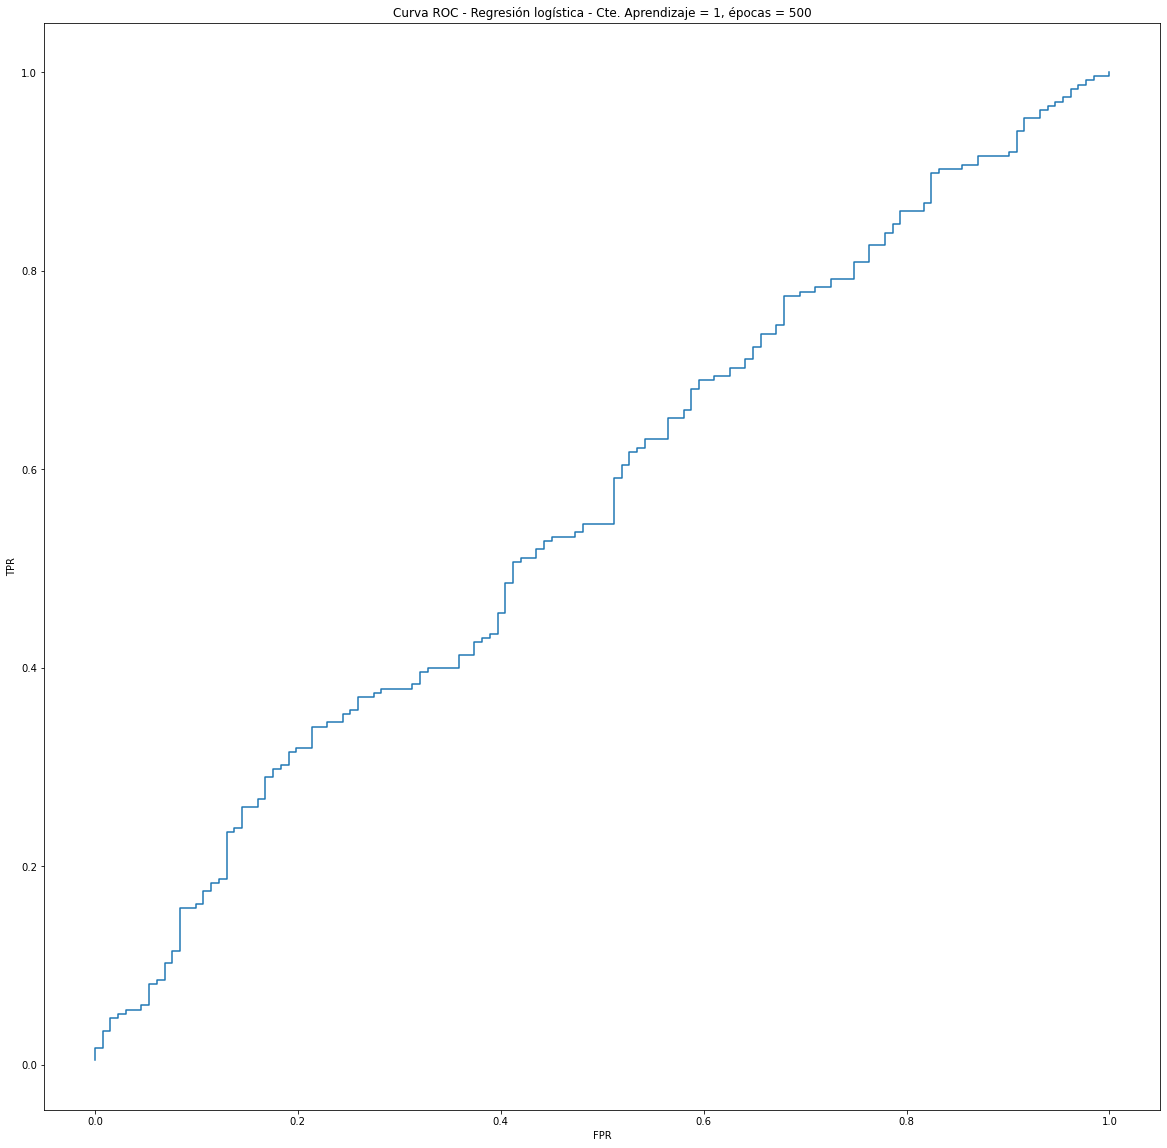

In [42]:
utils.plot_curva_ROC(pima, 1, 500, 50)

### 4.2 *WDBC*

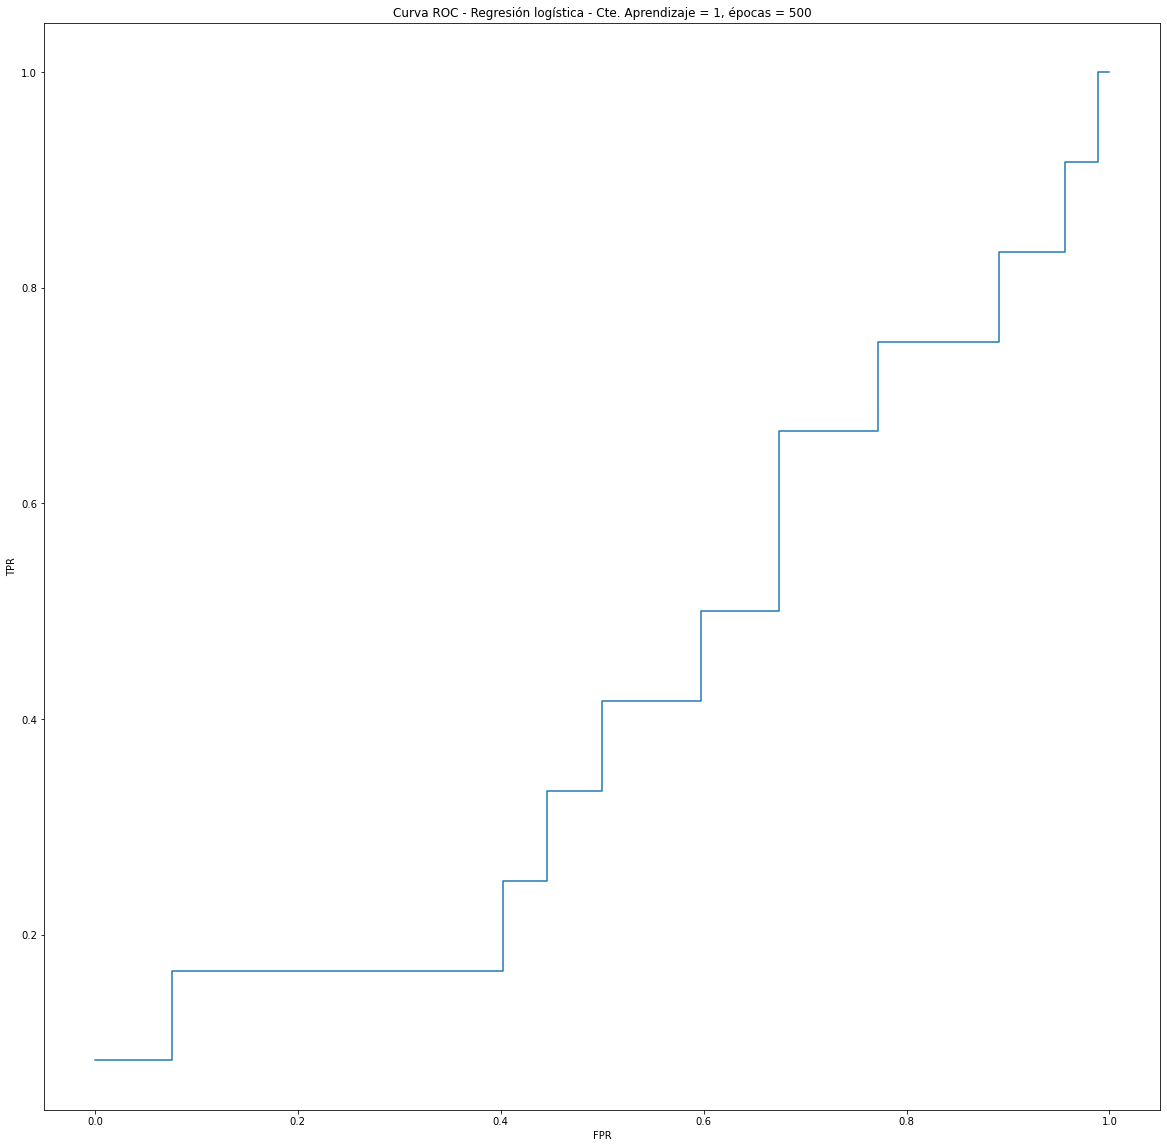

In [48]:
utils.plot_curva_ROC(wdbc, 1, 500, 50)

En cuanto a la curva ROC, también podemos ver que el AUC es muy cercano a 0.5 (o inferior), lo que nos da a entender que el modelo no es el mejor en cuanto a la clasificación de estos datos.